In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *

In [2]:
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.aqua import Operator, run_algorithm
from qiskit.aqua.input import EnergyInput
from qiskit.aqua.translators.ising import portfolio
from qiskit.aqua.translators.data_providers import RandomDataProvider
from qiskit.aqua.algorithms import VQE, QAOA, ExactEigensolver
from qiskit.aqua.components.optimizers import SPSA, COBYLA
from qiskit.aqua.components.variational_forms import RY
import qiskit.aqua.translators.ising.vehicle_routing as vr
import numpy as np
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import math
from timeit import default_timer as timer
from datetime import timedelta


In [3]:
%matplotlib inline
import numpy as np
import datetime
import networkx as nx
import matplotlib.pyplot as plt
import math
from timeit import default_timer as timer
from datetime import timedelta

In [4]:
# Initialize the problem by defining the parameters
n = 4  # number of nodes + depot (n+1)
K = 1  # number of vehicle

In [5]:
#this data is generated using D3 and copied X & Y values.
test_1_x = [1055,1573,1458,1392,1344,1280,1502,1212,1114,1134,1029,930,985,780,702,775,659,647,577,550,552,621,431,405,340,190,128,189,857,804,861,152,90,71,763,803,887,381,377,438,528,599,598,875,814,894,1070,1129,1071,1291,1333,1388,1426,1411,1363,228,230,142,1654,1539]
test_1_y = [354,519,549,463,556,484,459,622,671,595,647,657,596,632,568,569,712,775,773,678,612,638,654,722,721,726,697,648,388,352,315,413,465,387,273,221,251,181,118,153,54,42,105,88,36,27,27,50,95,123,71,111,167,244,285,182,245,194,161,117]

#This data is k-means clustered.
k_means_x = [1148,1093,1014,951,971,1035,978,958,873,797,861,780,702,775,659,647,577,550,552,621,431,405,340,190,128,189,352,289,284,152,90,71,89,123,158,381,377,438,528,599,598,860,814,894,1070,1129,1071,1291,1333,1388,1426,1411,1363,1491,1568,1570,1481,1430,1367,1360]
k_means_y = [539,572,587,585,518,744,771,710,741,722,674,632,568,569,712,775,773,678,612,638,654,722,721,726,697,648,510,518,454,413,465,387,220,147,204,181,118,153,54,42,105,104,36,27,27,50,95,122,71,111,167,244,285,490,492,555,696,733,722,715]


In [6]:
# x = test_1_x
# y = test_1_y
no_of_nodes = len(k_means_x)
x = k_means_x
y = k_means_y

#DataPrep
#Number of zones=
no_zones=20
#Hub Coordinates
x0 = 1079; y0 = 507
#Customer coordinates
import random 


# xs = xs_orig = np.array([1148,1093,1014,951,971,1035,978,958,873,797,861,780,702,775,659,647,577,550,552,621,431,405,340,190,128,189,352,289,284,152,90,71,89,123,158,381,377,438,528,599,598,860,814,894,1070,1129,1071,1291,1333,1388,1426,1411,1363,1491,1568,1570,1481,1430,1367,1360]))
# ys =  ys_orig = np.array([539,572,587,585,518,744,771,710,741,722,674,632,568,569,712,775,773,678,612,638,654,722,721,726,697,648,510,518,454,413,465,387,220,147,204,181,118,153,54,42,105,104,36,27,27,50,95,122,71,111,167,244,285,490,492,555,696,733,722,715]))

# x = x[1:no_of_nodes]
# y = y[1:no_of_nodes]

xs = xs_orig =np.array(x)
ys =  ys_orig = np.array(y)

print (len(ys_orig))
XS = np.split(xs_orig,no_zones)
YS = np.split(ys_orig,no_zones)
print ("XS:",XS,'\n')
print ("YS:",YS,'\n')
#Create nodes dictionary
nodes = {0:{'x':x0, 'y':y0, 'color':'#bbbb00','id':0}}
zones = [[]] * no_zones
zonecount=0; nodecount=0
for xzone in XS:
    yzone=YS[zonecount]
    zones[zonecount] = [0]
    #print("zone: ",zonecount," : ",xzone,yzone)
    i=0
    for x in xzone:
        nodes[nodecount+1] = {'x':x,'y':yzone[i], 'color':'#00bbee', 'id':(nodecount+1)}
        zones[zonecount].append(nodecount+1)
        i = i+1
        nodecount=nodecount+1
    print(zones[zonecount])
    zonecount=zonecount+1
print(nodes)

60
XS: [array([1148, 1093, 1014]), array([ 951,  971, 1035]), array([978, 958, 873]), array([797, 861, 780]), array([702, 775, 659]), array([647, 577, 550]), array([552, 621, 431]), array([405, 340, 190]), array([128, 189, 352]), array([289, 284, 152]), array([90, 71, 89]), array([123, 158, 381]), array([377, 438, 528]), array([599, 598, 860]), array([ 814,  894, 1070]), array([1129, 1071, 1291]), array([1333, 1388, 1426]), array([1411, 1363, 1491]), array([1568, 1570, 1481]), array([1430, 1367, 1360])] 

YS: [array([539, 572, 587]), array([585, 518, 744]), array([771, 710, 741]), array([722, 674, 632]), array([568, 569, 712]), array([775, 773, 678]), array([612, 638, 654]), array([722, 721, 726]), array([697, 648, 510]), array([518, 454, 413]), array([465, 387, 220]), array([147, 204, 181]), array([118, 153,  54]), array([ 42, 105, 104]), array([36, 27, 27]), array([ 50,  95, 122]), array([ 71, 111, 167]), array([244, 285, 490]), array([492, 555, 696]), array([733, 722, 715])] 

[0, 1

In [97]:
def get_xs_and_ys_for_a_zone (zone_id):
    xs=[] ; ys=[]
    i=0
    for node in zones[zone_id]:
        xs.append(nodes.get(node).get('x'))
        ys.append(nodes.get(node).get('y'))
        i=i+1
    return xs,ys

#Create a random customer-customer distance matrix
def create_distance_matrix_for_zone(zone_id):
    xs, ys = get_xs_and_ys_for_a_zone(zone_id)
    print ('xs: ',xs,'ys: ',ys)
    n=len(xs)
    instance = np.zeros([n, n])
    for i in range(0, n):
        for j in range(i + 1, n):
            #print ('nodes = ',(xs[i],ys[i]),(xs[j],ys[j]))
            #Distance squared
            #instance[i, j] = (xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2
            instance[i, j] = math.sqrt((xs[i] - xs[j]) ** 2 + (ys[i] - ys[j]) ** 2)
            #jith element is made the same as ijth element - so that the matrix is a symmetric
            instance[j, i] = instance[i, j]
            #print (instance[i,j])
    return instance

def plot_nodes (graph, zone_id):
    xs, ys = get_xs_and_ys_for_a_zone(zone_id)
    nodelist=zones[zone_id]
    # plt.gca().invert_yaxis()
    # plt.gca().invert_xaxis()
    n=len(xs)
    keys = range(len(xs))
    i=0
    for k in nodelist:
        pos[k] = (xs[i], ys[i])
        i=i+1
    print("----- nodes position for this zone: ", pos)
    nodes_position [zone_id] = pos 
    plt.figure()
    fig = plt.gcf()
    ax=fig.gca()
    fig.set_size_inches(12,8)
    plt.title('Customer Graph')
    plt.xlabel('X')
    plt.ylabel('Y')

    # Add Edges
    #for i in keys:
    #    for j in range(i+1, n):
    #        X.add_edge(i, j, length=int(instance[i][j]))
    # Add Edges
    i=0;j=1
    for i in range(len(nodelist)):
        for j in range(i+1, n):
            node_a=nodelist[i]; node_b=nodelist[j]
            X.add_edge(node_a, node_b, length=int(instance[i][j]))

    nx.draw_networkx(graph, pos, node_size=350, edge_color='#cccccc',ax=ax,
                     nodelist=nodelist, node_color='#00bbee', alpha=0.7, with_labels=True)
    labels = nx.get_edge_attributes(graph, "length")
    print(labels)
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    #plt.grid(True)
    plt.show()
    return nodes_position

def get_hamiltonian_paths(graph, target):
    allpaths = nx.all_simple_paths(graph, source=0, target=target)
    #Print Hamiltonian Paths
    selectedPaths = [path for path in list(allpaths) if len(path)==4]
    return selectedPaths   

def get_min_cost_function(selectedPaths) :
    min_cost=100000
    min_cost_path = None
    for path in list(selectedPaths):
        total_length=0
        for k in range(len(path)-1):
            x,y = path[k], path[k+1]
            edge = X[x][y]
            length = edge['length']
            total_length += length
        print('{}: {}'.format(path, total_length))
        if min_cost>total_length:
            min_cost=total_length
            min_cost_path = path
    return min_cost, min_cost_path
# Visualize the solution
def draw_tsp_solution(G, order, pos):
    plt.figure()
    fig = plt.gcf()
    fig.set_size_inches(12,8)
    plt.title('Customer Graph : Cost = '+ str(min_cost))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid()

    G1 = G.copy()
    edges = list(G1.edges())
    G2 = G1.remove_edges_from(edges)
    G1 = G1.to_directed()
    n = len(order)
    i=0;j=1
    for i in range(len(order)-1):
        j=i+1
        node_a=order[i]; node_b=order[i+1]
        G1.add_edge(node_a, node_b, length=int(instance[i][j]))
    G1.add_edge(order[j], order[0],length=int(instance[j][0]))
    """
    for i in range(n-1):
        j = (i+1)#(i + 1) % n
        print(order[i],order[j])
        G1.add_edge(order[i], order[j],length=int(instance[order[i]][order[j]]))
    G1.add_edge(order[j], order[0],length=int(instance[order[j]][order[0]]))
    """
    #create node colors array
    colors = np.full(n,'#00bbee')
    colors[order[0]]='#bbbb00'
    default_axes = plt.axes(frameon=True)
    ax=fig.gca()
    nx.draw_networkx(G1, pos, node_size=350, edge_color='#cccccc', ax=ax, 
                     node_color=colors, alpha=0.7, arrowsize=20)
    labels = nx.get_edge_attributes(G1, "length")
    #print(labels)
    nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    plt.grid(True)
    plt.show()
    for t in list(G1.edges()):
        print("edge in G1: ", t)
        out_edges.append([t[0],t[1],'#cccccc',1])


xs:  [1079, 1148, 1093, 1014] ys:  [507, 539, 572, 587]

----For Zone 0----
start timer :  601090.019562961
distance matrix : 
 [[  0.          76.05918748  66.49060084 103.07764064]
 [ 76.05918748   0.          64.14047084 142.33762679]
 [ 66.49060084  64.14047084   0.          80.41144197]
 [103.07764064 142.33762679  80.41144197   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 1: (1148, 539), 2: (1093, 572), 3: (1014, 587)}
{(0, 1): 76, (1, 2): 64, (1, 3): 142, (2, 3): 80, (0, 3): 103, (0, 2): 66}


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


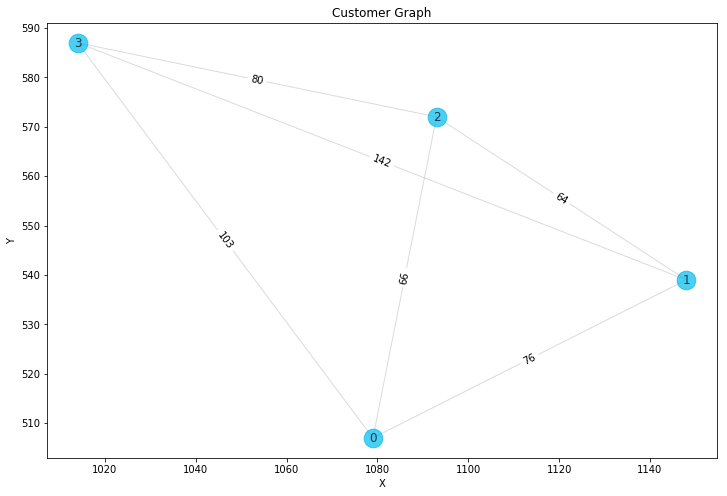

All Hamiltonian Paths from 0-3 :
 [[0, 1, 2, 3], [0, 2, 1, 3]] 

[0, 1, 2, 3]: 220
[0, 2, 1, 3]: 272
Minimum Cost for Zone 0: [0, 1, 2, 3] : 220


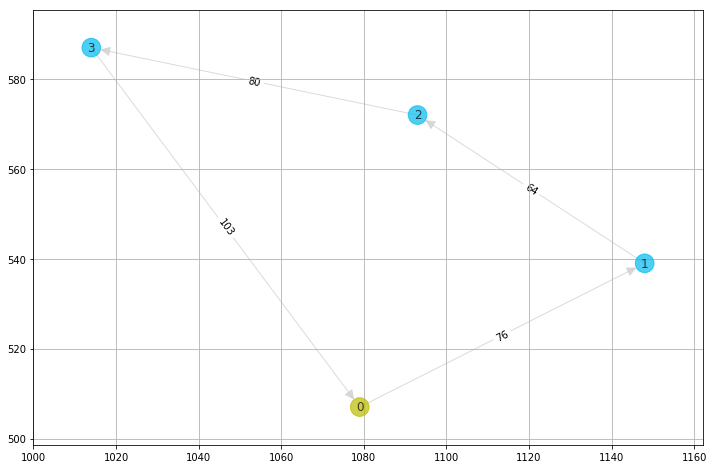

edge in G1:  (0, 1)
edge in G1:  (1, 2)
edge in G1:  (2, 3)
edge in G1:  (3, 0)
end timer:  601091.441952698

------- time difference in seconds :  85.343384



xs:  [1079, 951, 971, 1035] ys:  [507, 585, 518, 744]

----For Zone 1----
start timer :  601091.44403284
distance matrix : 
 [[  0.         149.89329538 108.55873986 241.04978739]
 [149.89329538   0.          69.92138443 179.82491485]
 [108.55873986  69.92138443   0.         234.88720697]
 [241.04978739 179.82491485 234.88720697   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 4: (951, 585), 5: (971, 518), 6: (1035, 744)}
{(0, 6): 241, (5, 6): 234, (0, 5): 108, (4, 6): 179, (0, 4): 149, (4, 5): 69}


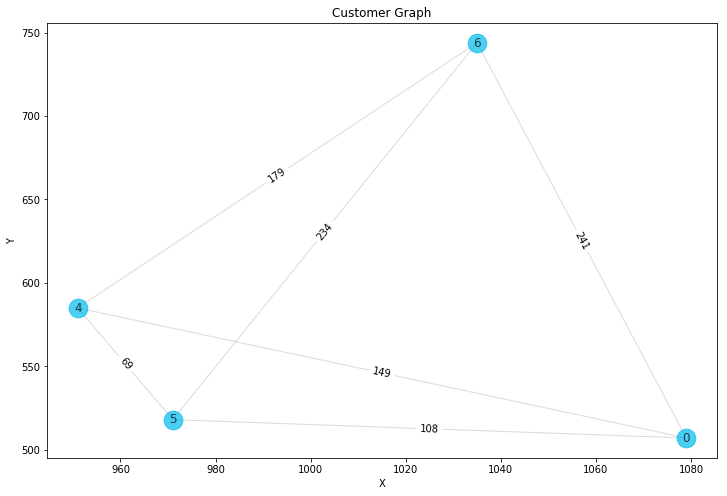

All Hamiltonian Paths from 0-6 :
 [[0, 4, 5, 6], [0, 5, 4, 6]] 

[0, 4, 5, 6]: 452
[0, 5, 4, 6]: 356
Minimum Cost for Zone 1: [0, 5, 4, 6] : 356


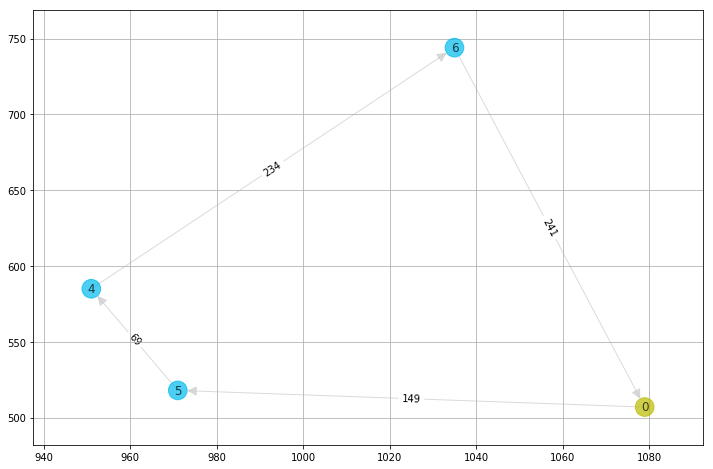

edge in G1:  (0, 5)
edge in G1:  (4, 6)
edge in G1:  (5, 4)
edge in G1:  (6, 0)
end timer:  601092.3705441

------- time difference in seconds :  55.590676



xs:  [1079, 978, 958, 873] ys:  [507, 771, 710, 741]

----For Zone 2----
start timer :  601092.371414559
distance matrix : 
 [[  0.         282.66057383 236.32604596 311.75631509]
 [282.66057383   0.          64.19501538 109.20164834]
 [236.32604596  64.19501538   0.          90.47651629]
 [311.75631509 109.20164834  90.47651629   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 8: (958, 710), 9: (873, 741), 7: (978, 771)}
{(8, 9): 90, (8, 7): 64, (0, 9): 311, (0, 8): 236, (0, 7): 282, (9, 7): 109}


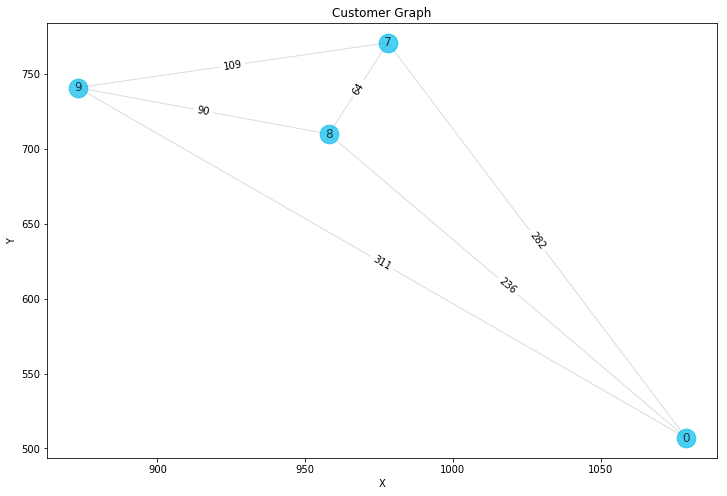

All Hamiltonian Paths from 0-9 :
 [[0, 8, 7, 9], [0, 7, 8, 9]] 

[0, 8, 7, 9]: 409
[0, 7, 8, 9]: 436
Minimum Cost for Zone 2: [0, 8, 7, 9] : 409


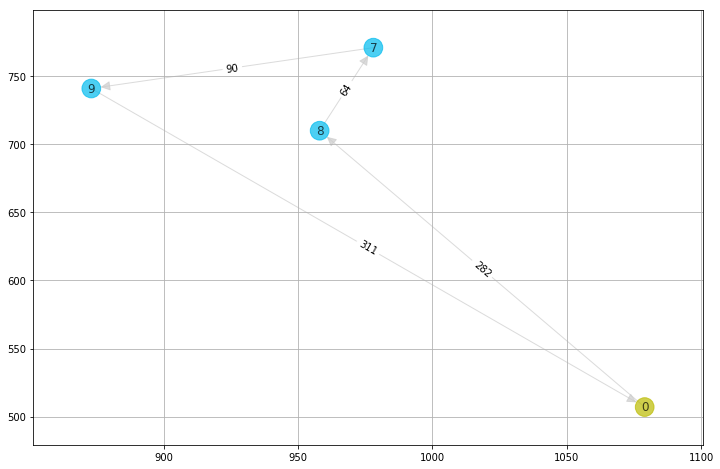

edge in G1:  (0, 8)
edge in G1:  (8, 7)
edge in G1:  (9, 0)
edge in G1:  (7, 9)
end timer:  601093.217014323

------- time difference in seconds :  50.735986



xs:  [1079, 797, 861, 780] ys:  [507, 722, 674, 632]

----For Zone 3----
start timer :  601093.217287412
distance matrix : 
 [[  0.         354.61105454 274.61427494 324.07715131]
 [354.61105454   0.          80.          91.59148432]
 [274.61427494  80.           0.          91.24143795]
 [324.07715131  91.59148432  91.24143795   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 10: (797, 722), 11: (861, 674), 12: (780, 632)}
{(0, 11): 274, (10, 11): 80, (0, 10): 354, (11, 12): 91, (10, 12): 91, (0, 12): 324}


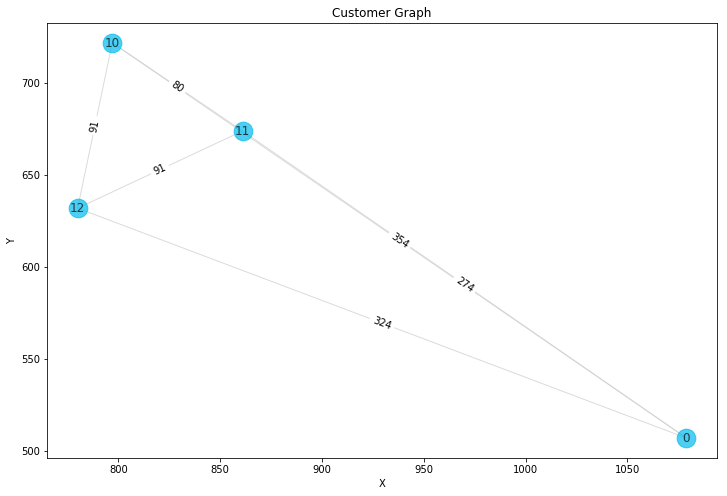

All Hamiltonian Paths from 0-12 :
 [[0, 10, 11, 12], [0, 11, 10, 12]] 

[0, 10, 11, 12]: 525
[0, 11, 10, 12]: 445
Minimum Cost for Zone 3: [0, 11, 10, 12] : 445


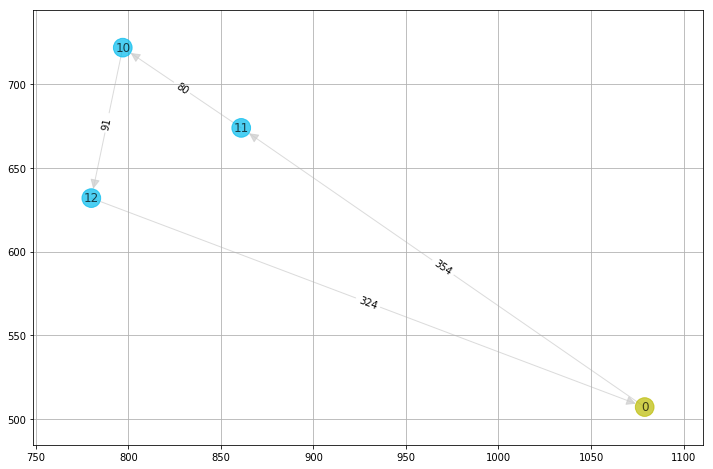

edge in G1:  (0, 11)
edge in G1:  (10, 12)
edge in G1:  (11, 10)
edge in G1:  (12, 0)
end timer:  601094.082053262

------- time difference in seconds :  51.885951



xs:  [1079, 702, 775, 659] ys:  [507, 568, 569, 712]

----For Zone 4----
start timer :  601094.082293775
distance matrix : 
 [[  0.         381.90312908 310.25795719 467.35960459]
 [381.90312908   0.          73.00684899 150.28306625]
 [310.25795719  73.00684899   0.         184.13310403]
 [467.35960459 150.28306625 184.13310403   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 13: (702, 568), 14: (775, 569), 15: (659, 712)}
{(14, 15): 184, (0, 15): 467, (13, 14): 73, (0, 14): 310, (13, 15): 150, (0, 13): 381}


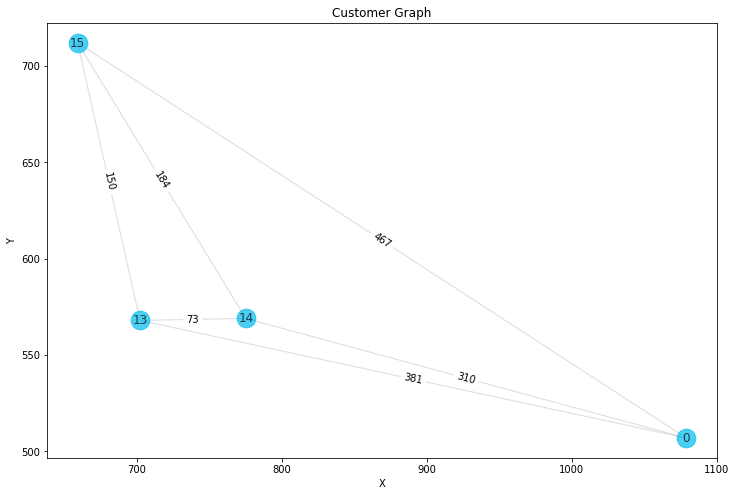

All Hamiltonian Paths from 0-15 :
 [[0, 13, 14, 15], [0, 14, 13, 15]] 

[0, 13, 14, 15]: 638
[0, 14, 13, 15]: 533
Minimum Cost for Zone 4: [0, 14, 13, 15] : 533


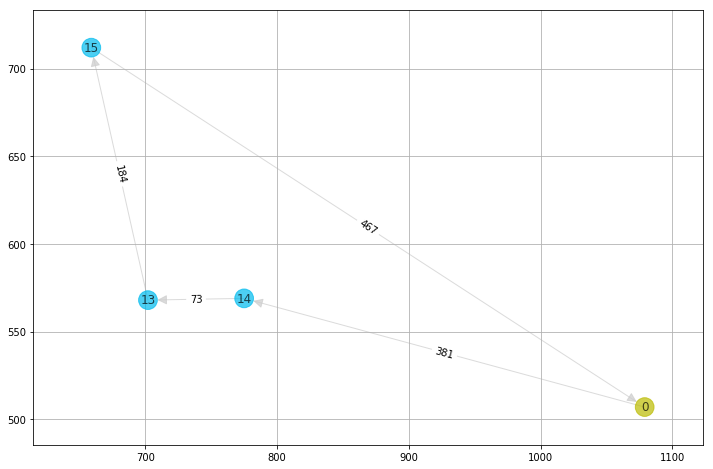

edge in G1:  (0, 14)
edge in G1:  (13, 15)
edge in G1:  (14, 13)
edge in G1:  (15, 0)
end timer:  601094.986755081

------- time difference in seconds :  54.267678



xs:  [1079, 647, 577, 550] ys:  [507, 775, 773, 678]

----For Zone 5----
start timer :  601094.987583719
distance matrix : 
 [[  0.         508.37781226 568.1197057  555.95143673]
 [508.37781226   0.          70.0285656  137.17871555]
 [568.1197057   70.0285656    0.          98.762341  ]
 [555.95143673 137.17871555  98.762341     0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 16: (647, 775), 18: (550, 678), 17: (577, 773)}
{(0, 17): 568, (16, 17): 70, (0, 16): 508, (0, 18): 555, (18, 17): 98, (16, 18): 137}


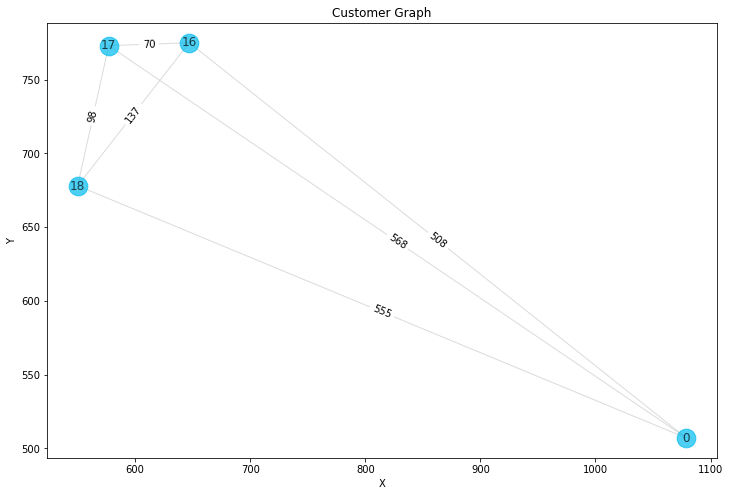

All Hamiltonian Paths from 0-18 :
 [[0, 16, 17, 18], [0, 17, 16, 18]] 

[0, 16, 17, 18]: 676
[0, 17, 16, 18]: 775
Minimum Cost for Zone 5: [0, 16, 17, 18] : 676


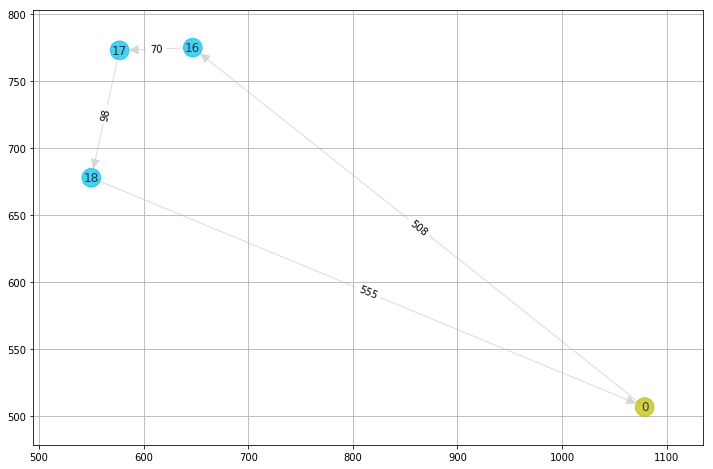

edge in G1:  (0, 16)
edge in G1:  (16, 17)
edge in G1:  (18, 0)
edge in G1:  (17, 18)
end timer:  601095.993570636

------- time difference in seconds :  60.359215



xs:  [1079, 552, 621, 431] ys:  [507, 612, 638, 654]

----For Zone 6----
start timer :  601095.993855689
distance matrix : 
 [[  0.         537.35835343 476.36645558 664.464446  ]
 [537.35835343   0.          73.73601562 128.08200498]
 [476.36645558  73.73601562   0.         190.67249408]
 [664.464446   128.08200498 190.67249408   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 19: (552, 612), 20: (621, 638), 21: (431, 654)}
{(0, 21): 664, (0, 20): 476, (20, 21): 190, (0, 19): 537, (19, 20): 73, (19, 21): 128}


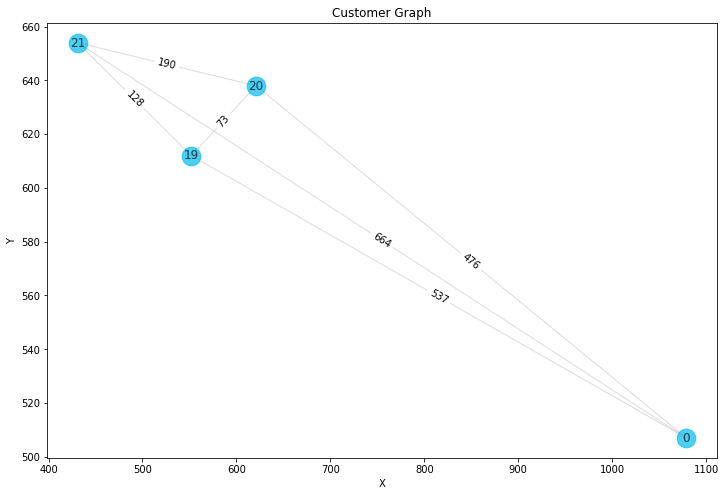

All Hamiltonian Paths from 0-21 :
 [[0, 19, 20, 21], [0, 20, 19, 21]] 

[0, 19, 20, 21]: 800
[0, 20, 19, 21]: 677
Minimum Cost for Zone 6: [0, 20, 19, 21] : 677


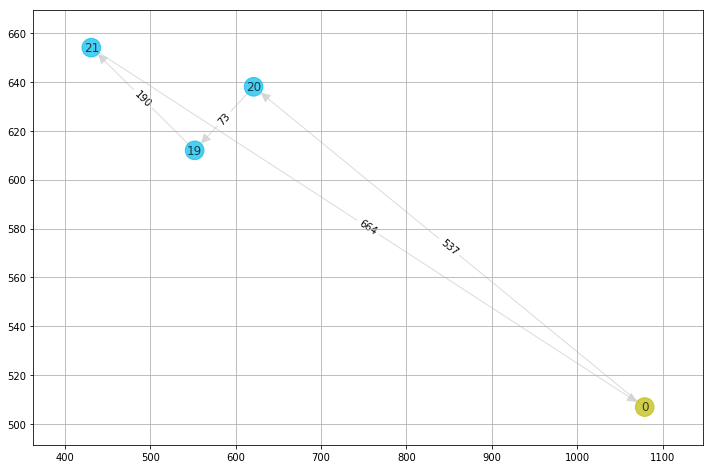

edge in G1:  (0, 20)
edge in G1:  (19, 21)
edge in G1:  (20, 19)
edge in G1:  (21, 0)
end timer:  601097.095092771

------- time difference in seconds :  66.074225



xs:  [1079, 405, 340, 190] ys:  [507, 722, 721, 726]

----For Zone 7----
start timer :  601097.095393052
distance matrix : 
 [[  0.         707.46095299 769.36142352 915.57741344]
 [707.46095299   0.          65.00769185 215.03720608]
 [769.36142352  65.00769185   0.         150.0833102 ]
 [915.57741344 215.03720608 150.0833102    0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 24: (190, 726), 22: (405, 722), 23: (340, 721)}
{(0, 22): 707, (22, 23): 65, (24, 23): 150, (24, 22): 215, (0, 24): 915, (0, 23): 769}


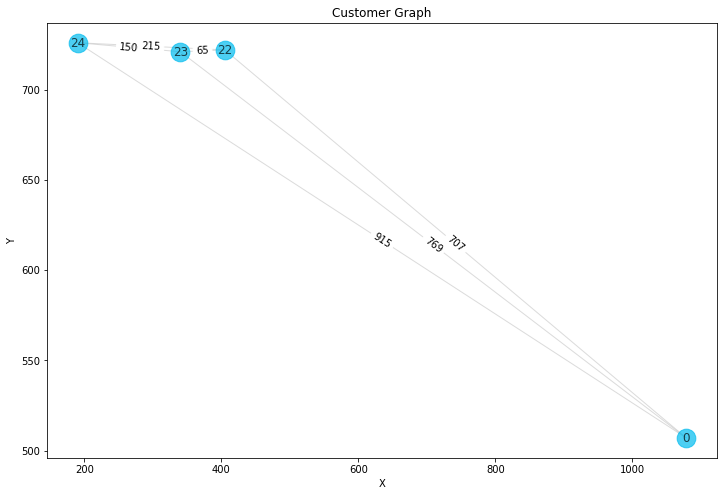

All Hamiltonian Paths from 0-24 :
 [[0, 22, 23, 24], [0, 23, 22, 24]] 

[0, 22, 23, 24]: 922
[0, 23, 22, 24]: 1049
Minimum Cost for Zone 7: [0, 22, 23, 24] : 922


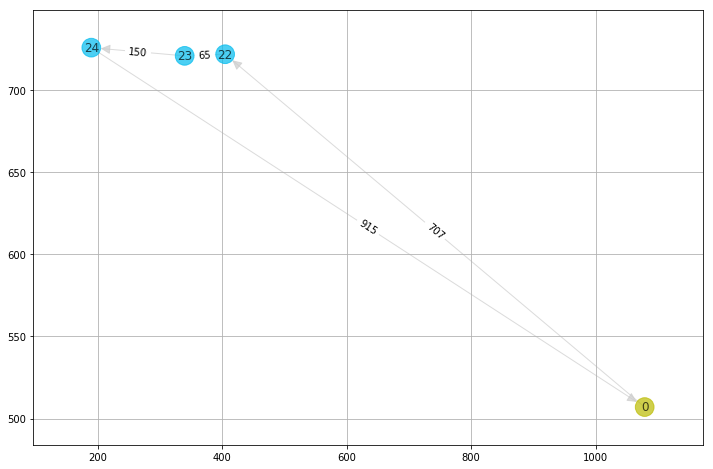

edge in G1:  (0, 22)
edge in G1:  (24, 0)
edge in G1:  (22, 23)
edge in G1:  (23, 24)
end timer:  601098.08911734

------- time difference in seconds :  59.623457



xs:  [1079, 128, 189, 352] ys:  [507, 697, 648, 510]

----For Zone 8----
start timer :  601098.089499465
distance matrix : 
 [[  0.         969.79430809 901.09988348 727.00618979]
 [969.79430809   0.          78.24321057 291.79616173]
 [901.09988348  78.24321057   0.         213.57200191]
 [727.00618979 291.79616173 213.57200191   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 25: (128, 697), 26: (189, 648), 27: (352, 510)}
{(25, 26): 78, (0, 27): 727, (25, 27): 291, (26, 27): 213, (0, 26): 901, (0, 25): 969}


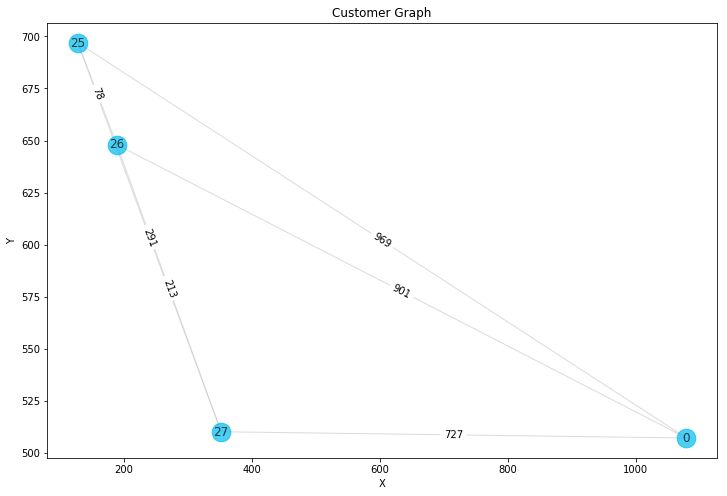

All Hamiltonian Paths from 0-27 :
 [[0, 25, 26, 27], [0, 26, 25, 27]] 

[0, 25, 26, 27]: 1260
[0, 26, 25, 27]: 1270
Minimum Cost for Zone 8: [0, 25, 26, 27] : 1260


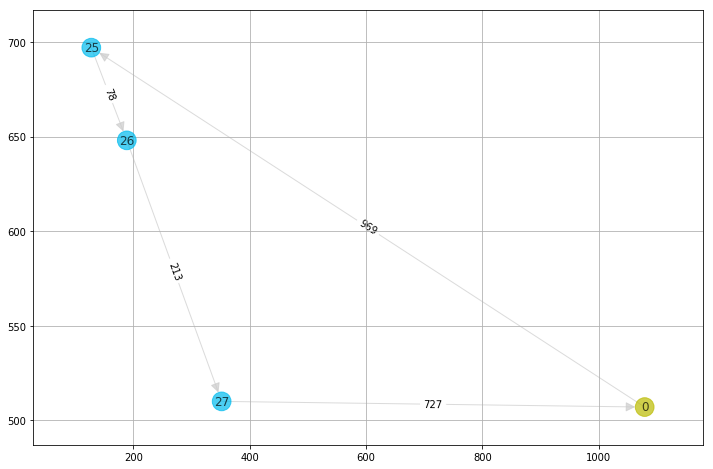

edge in G1:  (0, 25)
edge in G1:  (25, 26)
edge in G1:  (26, 27)
edge in G1:  (27, 0)
end timer:  601098.956746383

------- time difference in seconds :  52.034815



xs:  [1079, 289, 284, 152] ys:  [507, 518, 454, 413]

----For Zone 9----
start timer :  601098.956976796
distance matrix : 
 [[  0.         790.07657857 796.76470805 931.75372283]
 [790.07657857   0.          64.19501538 172.60938561]
 [796.76470805  64.19501538   0.         138.22083779]
 [931.75372283 172.60938561 138.22083779   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 28: (289, 518), 29: (284, 454), 30: (152, 413)}
{(29, 30): 138, (28, 30): 172, (28, 29): 64, (0, 30): 931, (0, 29): 796, (0, 28): 790}


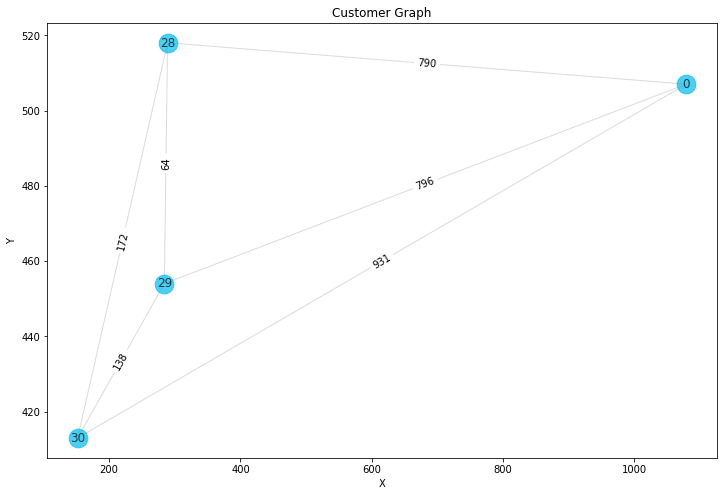

All Hamiltonian Paths from 0-30 :
 [[0, 28, 29, 30], [0, 29, 28, 30]] 

[0, 28, 29, 30]: 992
[0, 29, 28, 30]: 1032
Minimum Cost for Zone 9: [0, 28, 29, 30] : 992


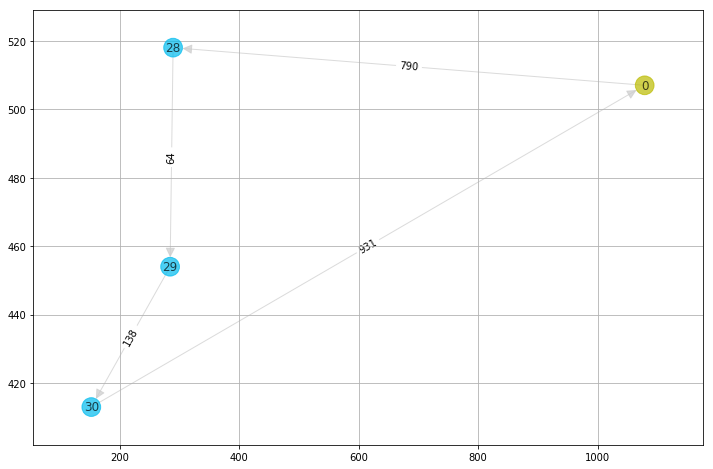

edge in G1:  (0, 28)
edge in G1:  (28, 29)
edge in G1:  (29, 30)
edge in G1:  (30, 0)
end timer:  601100.087173776

------- time difference in seconds :  67.811819



xs:  [1079, 90, 71, 89] ys:  [507, 465, 387, 220]

----For Zone 10----
start timer :  601100.088509062
distance matrix : 
 [[   0.          989.89140819 1015.11772716 1030.76136909]
 [ 989.89140819    0.           80.28075735  245.00204081]
 [1015.11772716   80.28075735    0.          167.96725871]
 [1030.76136909  245.00204081  167.96725871    0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 32: (71, 387), 33: (89, 220), 31: (90, 465)}
{(0, 33): 1030, (32, 33): 167, (0, 32): 1015, (0, 31): 989, (32, 31): 80, (33, 31): 245}


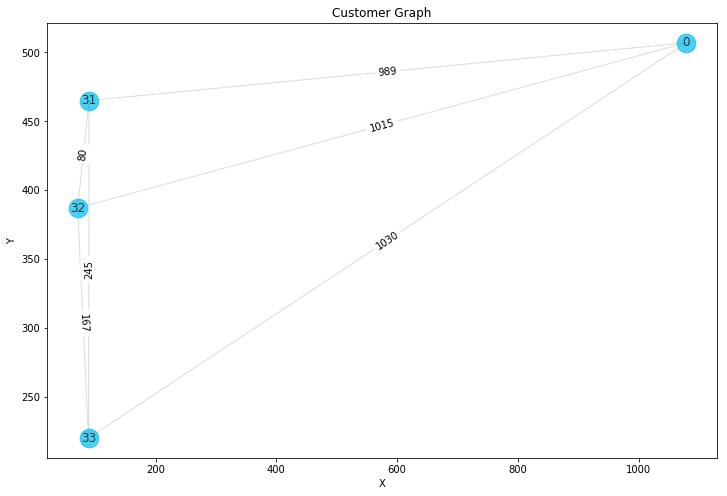

All Hamiltonian Paths from 0-33 :
 [[0, 32, 31, 33], [0, 31, 32, 33]] 

[0, 32, 31, 33]: 1340
[0, 31, 32, 33]: 1236
Minimum Cost for Zone 10: [0, 31, 32, 33] : 1236


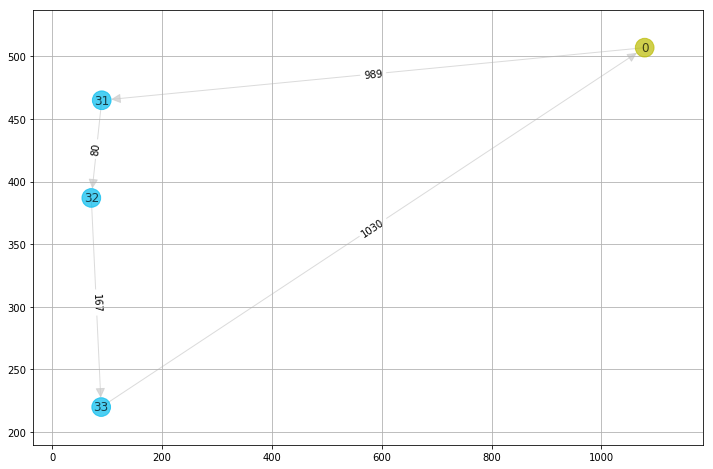

edge in G1:  (0, 31)
edge in G1:  (32, 33)
edge in G1:  (33, 0)
edge in G1:  (31, 32)
end timer:  601100.991705093

------- time difference in seconds :  54.191762



xs:  [1079, 123, 158, 381] ys:  [507, 147, 204, 181]

----For Zone 11----
start timer :  601100.991982234
distance matrix : 
 [[   0.         1021.53609824  969.56175667  770.37653131]
 [1021.53609824    0.           66.88796603  260.23066691]
 [ 969.56175667   66.88796603    0.          224.18296099]
 [ 770.37653131  260.23066691  224.18296099    0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 34: (123, 147), 35: (158, 204), 36: (381, 181)}
{(34, 35): 66, (0, 36): 770, (0, 35): 969, (35, 36): 224, (34, 36): 260, (0, 34): 1021}


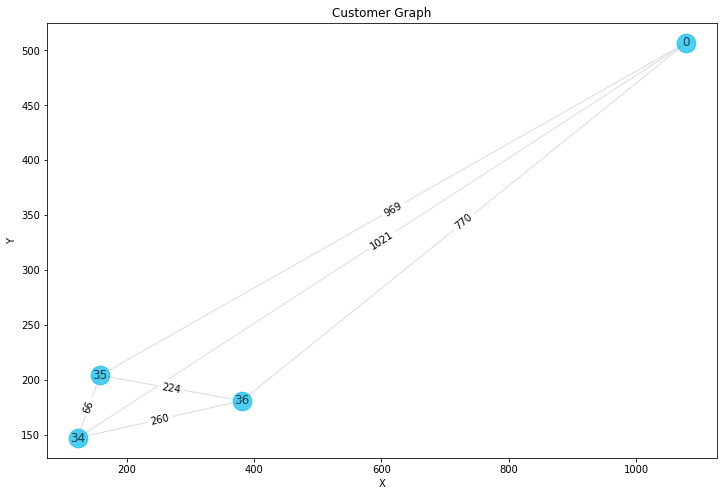

All Hamiltonian Paths from 0-36 :
 [[0, 34, 35, 36], [0, 35, 34, 36]] 

[0, 34, 35, 36]: 1311
[0, 35, 34, 36]: 1295
Minimum Cost for Zone 11: [0, 35, 34, 36] : 1295


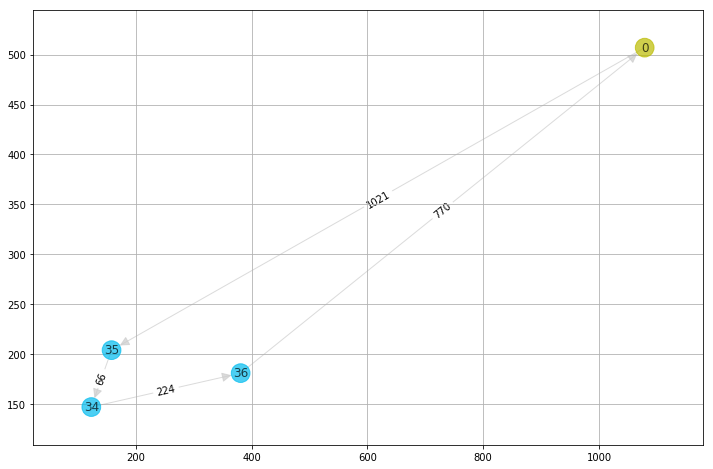

edge in G1:  (0, 35)
edge in G1:  (34, 36)
edge in G1:  (35, 34)
edge in G1:  (36, 0)
end timer:  601101.928957575

------- time difference in seconds :  56.21852



xs:  [1079, 377, 438, 528] ys:  [507, 118, 153, 54]

----For Zone 12----
start timer :  601101.929197711
distance matrix : 
 [[  0.         802.57398413 732.2547371  713.30918962]
 [802.57398413   0.          70.32780389 164.00304875]
 [732.2547371   70.32780389   0.         133.79461873]
 [713.30918962 164.00304875 133.79461873   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 37: (377, 118), 38: (438, 153), 39: (528, 54)}
{(0, 38): 732, (0, 37): 802, (37, 38): 70, (38, 39): 133, (37, 39): 164, (0, 39): 713}


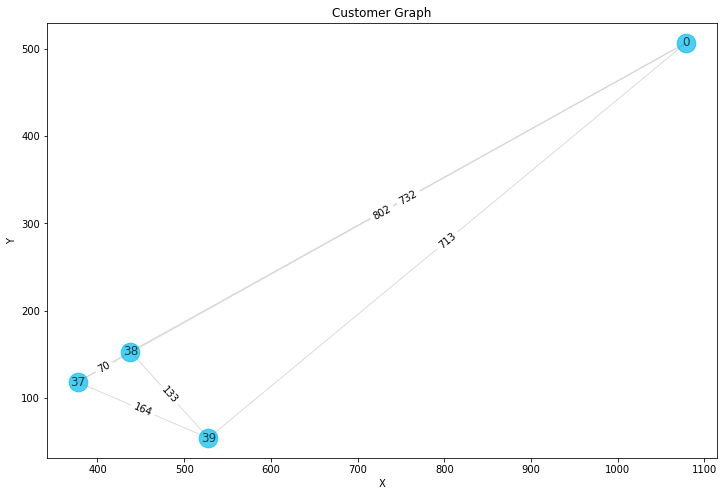

All Hamiltonian Paths from 0-39 :
 [[0, 37, 38, 39], [0, 38, 37, 39]] 

[0, 37, 38, 39]: 1005
[0, 38, 37, 39]: 966
Minimum Cost for Zone 12: [0, 38, 37, 39] : 966


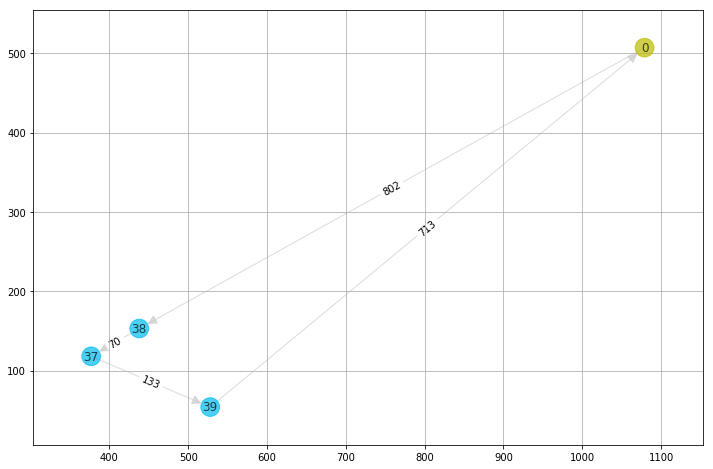

edge in G1:  (0, 38)
edge in G1:  (37, 39)
edge in G1:  (38, 37)
edge in G1:  (39, 0)
end timer:  601102.85789636

------- time difference in seconds :  55.721919



xs:  [1079, 599, 598, 860] ys:  [507, 42, 105, 104]

----For Zone 13----
start timer :  601102.858120128
distance matrix : 
 [[  0.         668.3000823  626.86920486 458.66109493]
 [668.3000823    0.          63.00793601 268.26293072]
 [626.86920486  63.00793601   0.         262.00190839]
 [458.66109493 268.26293072 262.00190839   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 40: (599, 42), 42: (860, 104), 41: (598, 105)}
{(40, 41): 63, (0, 42): 458, (0, 41): 626, (0, 40): 668, (40, 42): 268, (42, 41): 262}


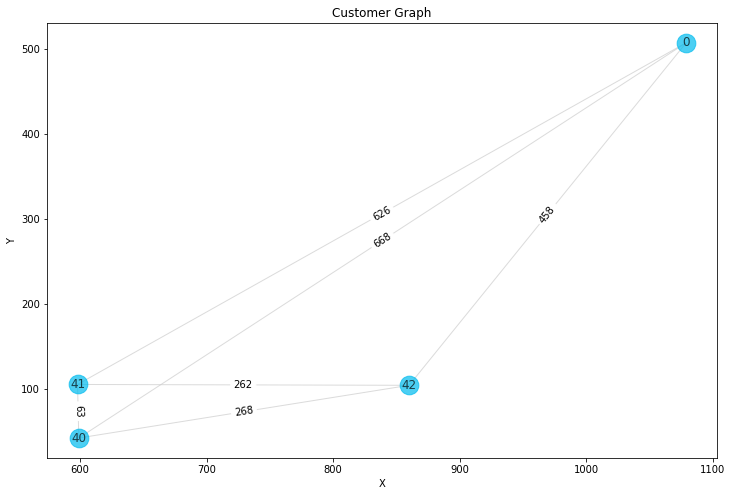

All Hamiltonian Paths from 0-42 :
 [[0, 40, 41, 42], [0, 41, 40, 42]] 

[0, 40, 41, 42]: 993
[0, 41, 40, 42]: 957
Minimum Cost for Zone 13: [0, 41, 40, 42] : 957


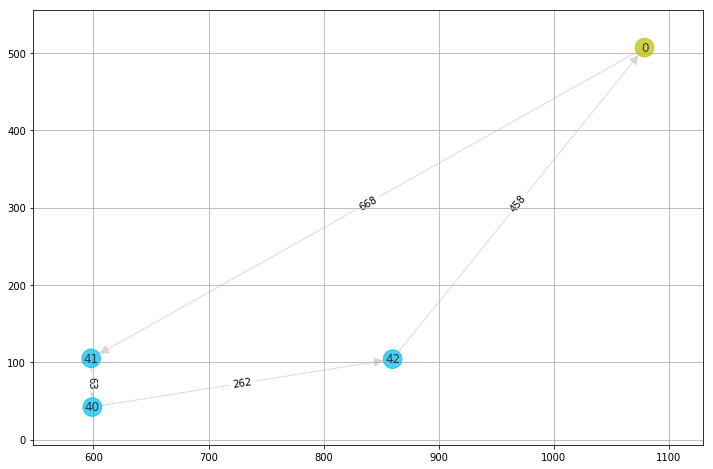

edge in G1:  (0, 41)
edge in G1:  (40, 42)
edge in G1:  (42, 0)
edge in G1:  (41, 40)
end timer:  601103.700889022

------- time difference in seconds :  50.566134



xs:  [1079, 814, 894, 1070] ys:  [507, 36, 27, 27]

----For Zone 14----
start timer :  601103.701163962
distance matrix : 
 [[  0.         540.43130923 514.4171459  480.08436759]
 [540.43130923   0.          80.50465825 256.15815427]
 [514.4171459   80.50465825   0.         176.        ]
 [480.08436759 256.15815427 176.           0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 43: (814, 36), 44: (894, 27), 45: (1070, 27)}
{(0, 43): 540, (44, 45): 176, (0, 45): 480, (0, 44): 514, (43, 44): 80, (43, 45): 256}


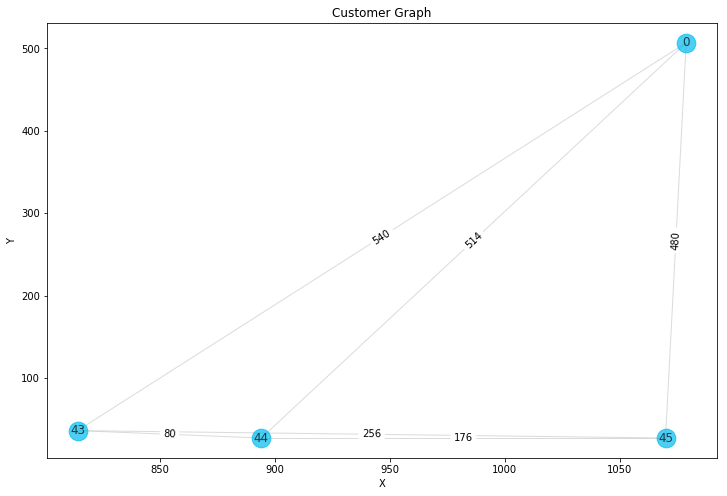

All Hamiltonian Paths from 0-45 :
 [[0, 43, 44, 45], [0, 44, 43, 45]] 

[0, 43, 44, 45]: 796
[0, 44, 43, 45]: 850
Minimum Cost for Zone 14: [0, 43, 44, 45] : 796


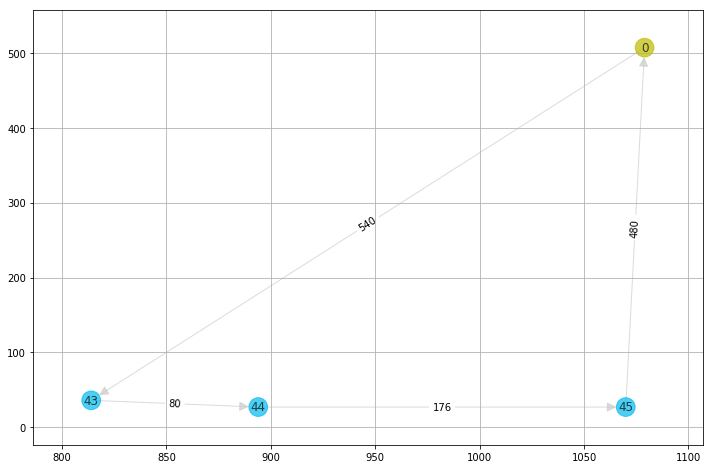

edge in G1:  (0, 43)
edge in G1:  (43, 44)
edge in G1:  (44, 45)
edge in G1:  (45, 0)
end timer:  601104.523455449

------- time difference in seconds :  49.337489



xs:  [1079, 1129, 1071, 1291] ys:  [507, 50, 95, 122]

----For Zone 15----
start timer :  601104.523753559
distance matrix : 
 [[  0.         459.72709296 412.07766258 439.50995438]
 [459.72709296   0.          73.40980861 177.27944043]
 [412.07766258  73.40980861   0.         221.65062599]
 [439.50995438 177.27944043 221.65062599   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 48: (1291, 122), 46: (1129, 50), 47: (1071, 95)}
{(0, 48): 439, (46, 47): 73, (0, 47): 412, (48, 47): 221, (48, 46): 177, (0, 46): 459}


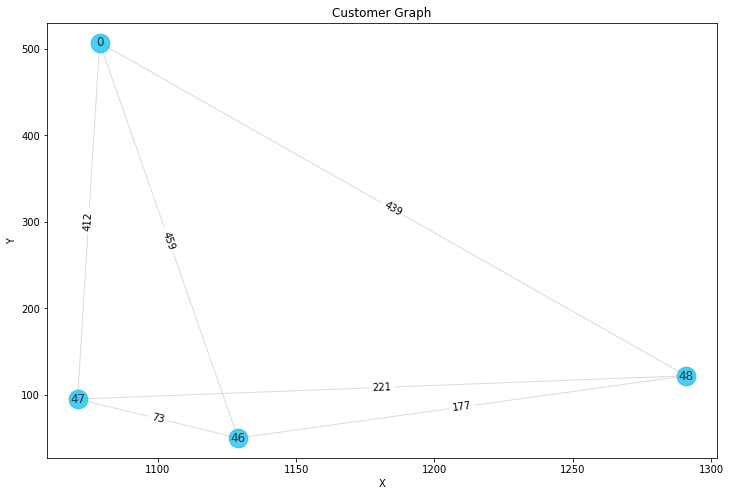

All Hamiltonian Paths from 0-48 :
 [[0, 46, 47, 48], [0, 47, 46, 48]] 

[0, 46, 47, 48]: 753
[0, 47, 46, 48]: 662
Minimum Cost for Zone 15: [0, 47, 46, 48] : 662


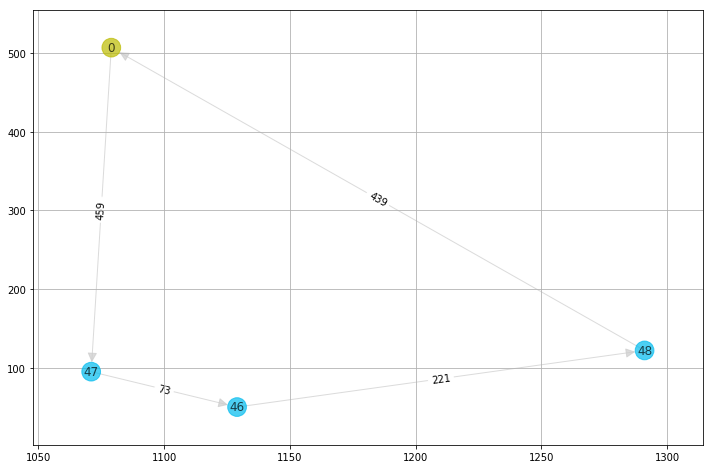

edge in G1:  (0, 47)
edge in G1:  (48, 0)
edge in G1:  (46, 48)
edge in G1:  (47, 46)
end timer:  601105.32465193

------- time difference in seconds :  48.053902



xs:  [1079, 1333, 1388, 1426] ys:  [507, 71, 111, 167]

----For Zone 16----
start timer :  601105.3249074
distance matrix : 
 [[  0.         504.59092342 502.29174789 485.80757507]
 [504.59092342   0.          68.00735254 133.66001646]
 [502.29174789  68.00735254   0.          67.67569726]
 [485.80757507 133.66001646  67.67569726   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 49: (1333, 71), 50: (1388, 111), 51: (1426, 167)}
{(0, 49): 504, (49, 50): 68, (49, 51): 133, (50, 51): 67, (0, 51): 485, (0, 50): 502}


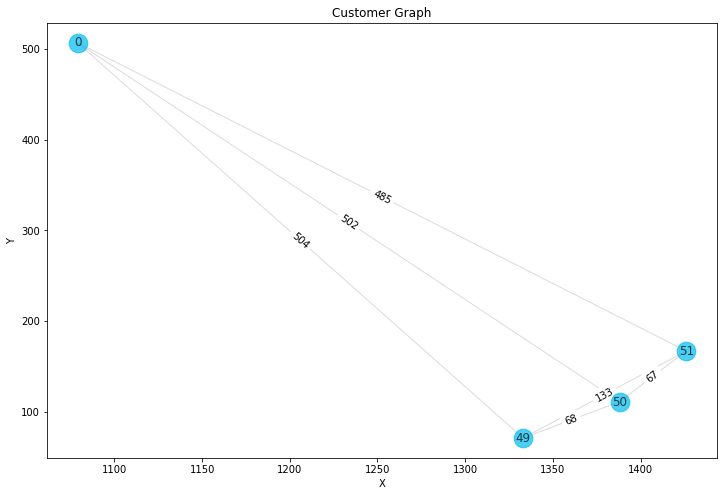

All Hamiltonian Paths from 0-51 :
 [[0, 49, 50, 51], [0, 50, 49, 51]] 

[0, 49, 50, 51]: 639
[0, 50, 49, 51]: 703
Minimum Cost for Zone 16: [0, 49, 50, 51] : 639


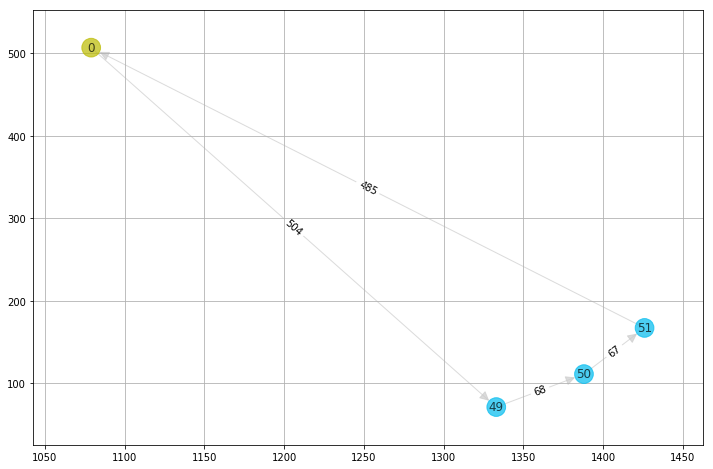

edge in G1:  (0, 49)
edge in G1:  (49, 50)
edge in G1:  (50, 51)
edge in G1:  (51, 0)
end timer:  601106.142881227

------- time difference in seconds :  49.07843



xs:  [1079, 1411, 1363, 1491] ys:  [507, 244, 285, 490]

----For Zone 17----
start timer :  601106.143251349
distance matrix : 
 [[  0.         423.54810825 360.47191291 412.350579  ]
 [423.54810825   0.          63.12685641 258.68127107]
 [360.47191291  63.12685641   0.         241.67953989]
 [412.350579   258.68127107 241.67953989   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 52: (1411, 244), 53: (1363, 285), 54: (1491, 490)}
{(0, 54): 412, (53, 54): 241, (0, 53): 360, (52, 54): 258, (0, 52): 423, (52, 53): 63}


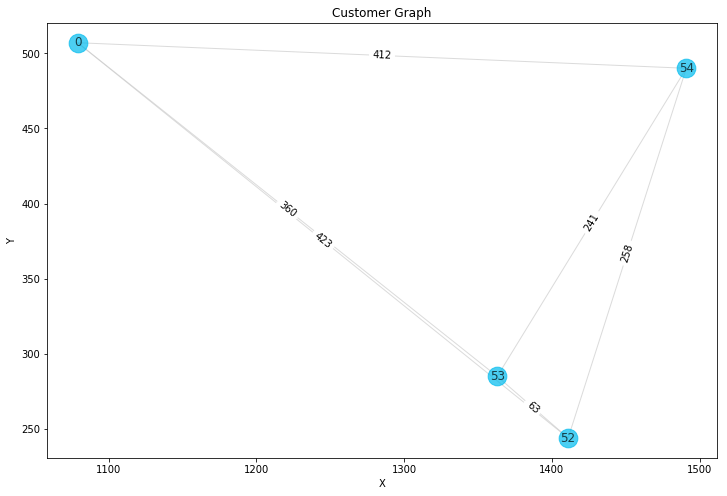

All Hamiltonian Paths from 0-54 :
 [[0, 52, 53, 54], [0, 53, 52, 54]] 

[0, 52, 53, 54]: 727
[0, 53, 52, 54]: 681
Minimum Cost for Zone 17: [0, 53, 52, 54] : 681


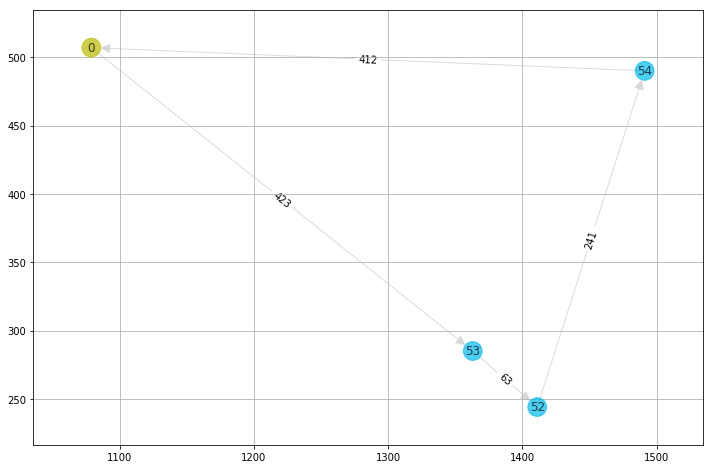

edge in G1:  (0, 53)
edge in G1:  (52, 54)
edge in G1:  (53, 52)
edge in G1:  (54, 0)
end timer:  601106.965082306

------- time difference in seconds :  49.309857



xs:  [1079, 1568, 1570, 1481] ys:  [507, 492, 555, 696]

----For Zone 18----
start timer :  601106.965363509
distance matrix : 
 [[  0.         489.23000726 493.3406531  444.21278685]
 [489.23000726   0.          63.03173804 221.77691494]
 [493.3406531   63.03173804   0.         166.7393175 ]
 [444.21278685 221.77691494 166.7393175    0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 56: (1570, 555), 57: (1481, 696), 55: (1568, 492)}
{(56, 57): 166, (56, 55): 63, (0, 57): 444, (0, 56): 493, (0, 55): 489, (57, 55): 221}


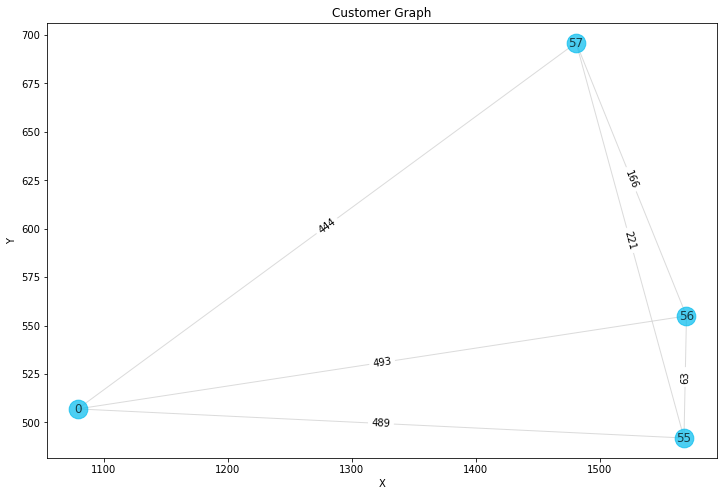

All Hamiltonian Paths from 0-57 :
 [[0, 56, 55, 57], [0, 55, 56, 57]] 

[0, 56, 55, 57]: 777
[0, 55, 56, 57]: 718
Minimum Cost for Zone 18: [0, 55, 56, 57] : 718


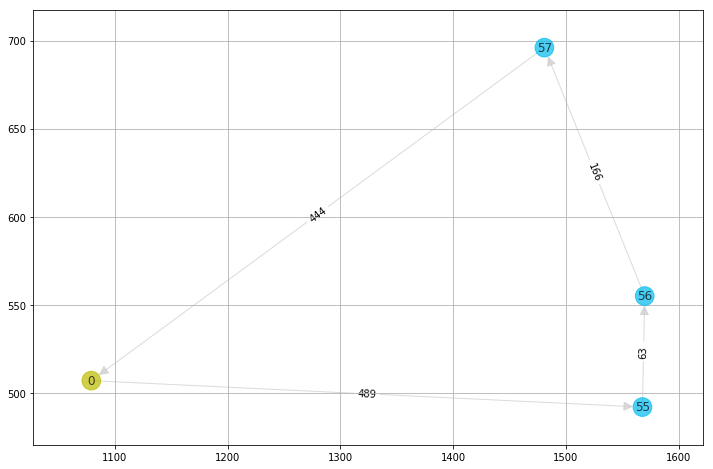

edge in G1:  (0, 55)
edge in G1:  (56, 57)
edge in G1:  (57, 0)
edge in G1:  (55, 56)
end timer:  601107.940609508

------- time difference in seconds :  58.51476



xs:  [1079, 1430, 1367, 1360] ys:  [507, 733, 722, 715]

----For Zone 19----
start timer :  601107.940901429
distance matrix : 
 [[  0.         417.46496859 359.40089037 349.60692213]
 [417.46496859   0.          63.95310782  72.277244  ]
 [359.40089037  63.95310782   0.           9.89949494]
 [349.60692213  72.277244     9.89949494   0.        ]]
----- nodes position for this zone:  {0: (1079, 507), 58: (1430, 733), 59: (1367, 722), 60: (1360, 715)}
{(0, 59): 359, (58, 59): 63, (0, 58): 417, (59, 60): 9, (58, 60): 72, (0, 60): 349}


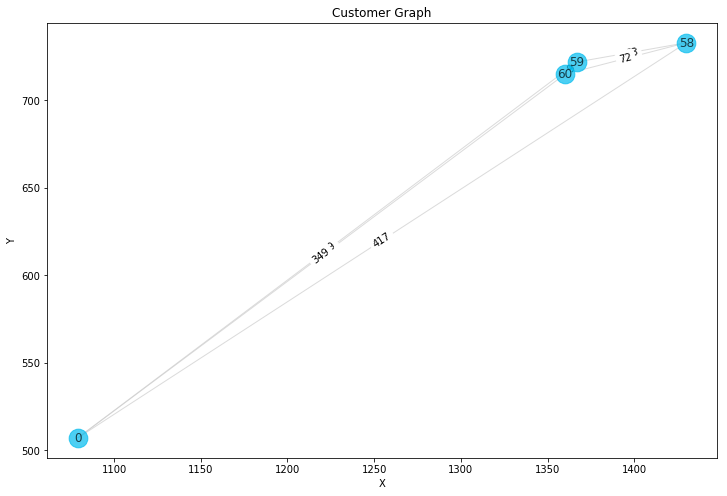

All Hamiltonian Paths from 0-60 :
 [[0, 58, 59, 60], [0, 59, 58, 60]] 

[0, 58, 59, 60]: 489
[0, 59, 58, 60]: 494
Minimum Cost for Zone 19: [0, 58, 59, 60] : 489


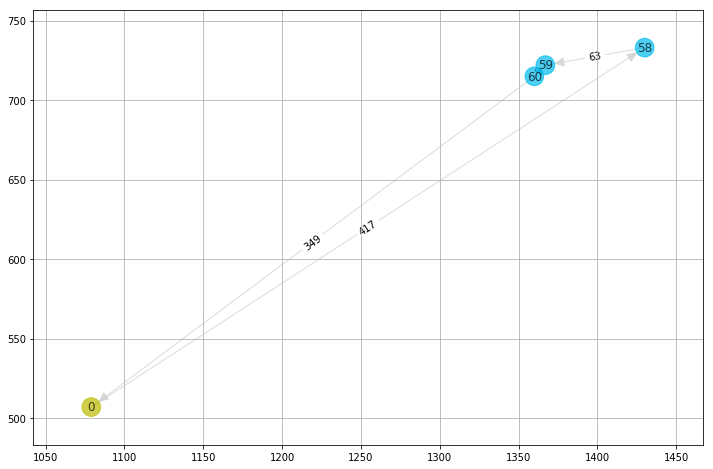

edge in G1:  (0, 58)
edge in G1:  (58, 59)
edge in G1:  (59, 60)
edge in G1:  (60, 0)
end timer:  601108.840808149

------- time difference in seconds :  53.994403





In [98]:
#Classical - Brute force solution
#Calculate the Hamiltonian path for all the zones 
solutions=[]
out_edges = [] 
time_diff = {}
min_cost_solutions = {}
nodes_position ={}
for zone_id in range(len(zones)):

    nodes_for_zone=zones[zone_id]
    instance=create_distance_matrix_for_zone(zone_id)
    print ("\n----For Zone %s----"%zone_id)
    start = timer()
    print("start timer : " , start)

    print ('distance matrix : \n',instance)
    X = nx.Graph()
    pos = {}
    nodes_position = plot_nodes(X,zone_id)
    selectedPaths = get_hamiltonian_paths(X,nodes_for_zone[3])
    print('All Hamiltonian Paths from 0-%s :\n'%nodes_for_zone[3],list(selectedPaths),'\n')
    min_cost, min_cost_path = get_min_cost_function(selectedPaths)
    print('Minimum Cost for Zone {}: {} : {}'.format(zone_id, min_cost_path, min_cost))
    min_cost_solutions[zone_id] = min_cost
    #Create the adjacency matrix
    x=np.zeros((n,n), dtype=int)
    #for k in range(len(min_cost_path)-1):
    #    x[min_cost_path[k]][min_cost_path[k+1]]=1
    #x[min_cost_path[k+1]][0]=1
    #x=x.flatten()
    #print(x) 


    draw_tsp_solution(X,min_cost_path,pos)
    solutions.append(min_cost_path)
    end = timer()
    print("end timer: " , end)
    
    time_diff[zone_id] = timedelta(minutes=end-start).total_seconds()
    
    print("\n------- time difference in seconds : " , timedelta(minutes=end-start).total_seconds())
    print("\n\n")



In [68]:

#min_cost_solutions
nodes_position

{0: {0: (1079, 507), 1: (1148, 539), 2: (1093, 572), 3: (1014, 587)},
 1: {0: (1079, 507), 4: (951, 585), 5: (971, 518), 6: (1035, 744)},
 2: {0: (1079, 507), 7: (978, 771), 8: (958, 710), 9: (873, 741)},
 3: {0: (1079, 507), 10: (797, 722), 11: (861, 674), 12: (780, 632)},
 4: {0: (1079, 507), 13: (702, 568), 14: (775, 569), 15: (659, 712)},
 5: {0: (1079, 507), 16: (647, 775), 17: (577, 773), 18: (550, 678)},
 6: {0: (1079, 507), 19: (552, 612), 20: (621, 638), 21: (431, 654)},
 7: {0: (1079, 507), 22: (405, 722), 23: (340, 721), 24: (190, 726)},
 8: {0: (1079, 507), 25: (128, 697), 26: (189, 648), 27: (352, 510)},
 9: {0: (1079, 507), 28: (289, 518), 29: (284, 454), 30: (152, 413)},
 10: {0: (1079, 507), 31: (90, 465), 32: (71, 387), 33: (89, 220)},
 11: {0: (1079, 507), 34: (123, 147), 35: (158, 204), 36: (381, 181)},
 12: {0: (1079, 507), 37: (377, 118), 38: (438, 153), 39: (528, 54)},
 13: {0: (1079, 507), 40: (599, 42), 41: (598, 105), 42: (860, 104)},
 14: {0: (1079, 507), 43: 

In [69]:
print("Time Difference in  for all zones ")
print(time_diff)

Time Difference in  for all zones 
{0: 51.800165, 1: 51.556486, 2: 49.296745, 3: 50.032914, 4: 57.281291, 5: 49.091763, 6: 49.743863, 7: 45.233206, 8: 46.44067, 9: 50.05399, 10: 53.889776, 11: 55.328664, 12: 55.259956, 13: 65.455556, 14: 53.944715, 15: 51.609372, 16: 57.431829, 17: 48.657213, 18: 50.497162, 19: 50.145205}


In [70]:
def get_coordinates_array(xs,ys):
    coords=[[]] * len(xs)
    for i in range(len(xs)):
        coords[i]=([xs[i],ys[i]])
    return coords

def shift_solution_nodes(z):
    z2 = np.zeros(len(z), dtype=int)
    i = z.index(0)
    roll_by = len(z)-i
    z1 = np.roll(z,roll_by)
    keys = list(pos.keys())
    for i in range(len(z)):
        z2[i] = keys[z1[i]]
    return z2


In [71]:
all_path_sum =0
all_path_count=0
for zone_id in range(len(min_cost_solutions)):
    
    print(solutions[zone_id], min_cost_solutions[zone_id])
    all_path_sum += min_cost_solutions[zone_id]
    all_path_count +=1
print("\n all_path_sum: " , all_path_sum)
print("\n all_path_count: " , all_path_count)

[0, 1, 2, 3] 220
[0, 5, 4, 6] 356
[0, 8, 7, 9] 409
[0, 11, 10, 12] 445
[0, 14, 13, 15] 533
[0, 16, 17, 18] 676
[0, 20, 19, 21] 677
[0, 22, 23, 24] 922
[0, 25, 26, 27] 1260
[0, 28, 29, 30] 992
[0, 31, 32, 33] 1236
[0, 35, 34, 36] 1295
[0, 38, 37, 39] 966
[0, 41, 40, 42] 957
[0, 43, 44, 45] 796
[0, 47, 46, 48] 662
[0, 49, 50, 51] 639
[0, 53, 52, 54] 681
[0, 55, 56, 57] 718
[0, 58, 59, 60] 489

 all_path_sum:  14929

 all_path_count:  20


In [72]:
solutions

[[0, 1, 2, 3],
 [0, 5, 4, 6],
 [0, 8, 7, 9],
 [0, 11, 10, 12],
 [0, 14, 13, 15],
 [0, 16, 17, 18],
 [0, 20, 19, 21],
 [0, 22, 23, 24],
 [0, 25, 26, 27],
 [0, 28, 29, 30],
 [0, 31, 32, 33],
 [0, 35, 34, 36],
 [0, 38, 37, 39],
 [0, 41, 40, 42],
 [0, 43, 44, 45],
 [0, 47, 46, 48],
 [0, 49, 50, 51],
 [0, 53, 52, 54],
 [0, 55, 56, 57],
 [0, 58, 59, 60]]

In [73]:
solutions[0]
min_cost_solutions[0]

220

In [74]:
nodes

{0: {'color': '#bbbb00', 'id': 0, 'x': 1079, 'y': 507},
 1: {'color': '#00bbee', 'id': 1, 'x': 1148, 'y': 539},
 2: {'color': '#00bbee', 'id': 2, 'x': 1093, 'y': 572},
 3: {'color': '#00bbee', 'id': 3, 'x': 1014, 'y': 587},
 4: {'color': '#00bbee', 'id': 4, 'x': 951, 'y': 585},
 5: {'color': '#00bbee', 'id': 5, 'x': 971, 'y': 518},
 6: {'color': '#00bbee', 'id': 6, 'x': 1035, 'y': 744},
 7: {'color': '#00bbee', 'id': 7, 'x': 978, 'y': 771},
 8: {'color': '#00bbee', 'id': 8, 'x': 958, 'y': 710},
 9: {'color': '#00bbee', 'id': 9, 'x': 873, 'y': 741},
 10: {'color': '#00bbee', 'id': 10, 'x': 797, 'y': 722},
 11: {'color': '#00bbee', 'id': 11, 'x': 861, 'y': 674},
 12: {'color': '#00bbee', 'id': 12, 'x': 780, 'y': 632},
 13: {'color': '#00bbee', 'id': 13, 'x': 702, 'y': 568},
 14: {'color': '#00bbee', 'id': 14, 'x': 775, 'y': 569},
 15: {'color': '#00bbee', 'id': 15, 'x': 659, 'y': 712},
 16: {'color': '#00bbee', 'id': 16, 'x': 647, 'y': 775},
 17: {'color': '#00bbee', 'id': 17, 'x': 577, 

In [75]:
solutions


[[0, 1, 2, 3],
 [0, 5, 4, 6],
 [0, 8, 7, 9],
 [0, 11, 10, 12],
 [0, 14, 13, 15],
 [0, 16, 17, 18],
 [0, 20, 19, 21],
 [0, 22, 23, 24],
 [0, 25, 26, 27],
 [0, 28, 29, 30],
 [0, 31, 32, 33],
 [0, 35, 34, 36],
 [0, 38, 37, 39],
 [0, 41, 40, 42],
 [0, 43, 44, 45],
 [0, 47, 46, 48],
 [0, 49, 50, 51],
 [0, 53, 52, 54],
 [0, 55, 56, 57],
 [0, 58, 59, 60]]

In [211]:
## agreegation
aggregated_solution = []
nodes_to_join= []
nodes_to_join_tuples= []
joined = []
agreegated_edges = []

zone_len = len(solutions)
start = timer()
count=0
agg_minimal_cost=0
all_path_sum =0
all_path_count=0
distance_nodes_to_join = {}
for zone in range(zone_len):
    distance_nodes_to_join[zone] = min_cost_solutions [zone]
    agg_minimal_cost += min_cost_solutions[zone]
    all_path_sum += min_cost_solutions[zone]
    all_path_count +=1 

    if(zone not in joined) :
        distance={}
        for zone_j in range(zone+1,zone_len):
            #print("---------zone is : -------: " , zone)
            #print("---------zone_j is : -------: " , zone_j)  
            l = [1,3]
            for i in l:
                for j in l:

                    nodeA = solutions[zone][i] # 3-5, 3-6, 3-8, 3-9
                    nodeB = solutions[zone_j][j]
                    #print(nodeA, nodeB)
                    distance[nodeA,nodeB,zone_j ] = math.sqrt((nodes[nodeA]['x'] - nodes[nodeB]['x']) ** 2 + (nodes[nodeA]['y'] - nodes[nodeB]['y']) ** 2)          
                
        distance = sorted(distance.items(), key=lambda kv: kv[1])
        #print("sorted distance : {}".format(distance))
        joined.append(distance[0][0][2])
        
        
        nodes_to_join_tuples.append((distance[0][0][0], distance[0][0][1]))
        nodes_to_join_tuples.append((solutions[joined[-1]][3] ,  0))
        
        zone = zone +1
        nodes_to_join = [item for t in nodes_to_join_tuples for item in t] 


continue_joining=True
# print("\naggregated sum: " , aggre_sum)
# print("\naggregated counnt: " , count)
print("minimal cost aggregation : ", agg_minimal_cost)
    
agg_count =0
aggregated_solution = []
zne =0
agg_sum =0
print("----------------------------")
print(nodes_to_join)
nodes_to_remove= []
while(continue_joining):
    deleted=False
   
    if (zne <20):
        print('\nzone is : ', zne)
        print("solutions [zne] : ",solutions [zne])
        print("minimal cost [zne] : ",min_cost_solutions [zne])
        agg_sum += min_cost_solutions [zne]
        print("agg sum  with min cost solutions : ",agg_sum )
    
    l1 =[]
    l2 = []
        
    for k in range(len(nodes_to_join)-1):
        minus_distance =0
        nodeA=nodes_to_join[k]
        nodeB=nodes_to_join[k+1]
        distance = math.sqrt((nodes[nodeA]['x'] - nodes[nodeB]['x']) ** 2 + (nodes[nodeA]['y'] - nodes[nodeB]['y']) ** 2)
        print("Adding these two nodes between two clusters : " , nodeA,nodeB," the distance is:  ",distance)
        #adding distance between two joined nodes of different clusters
        agg_sum += distance
        all_path_sum += distance

        print("agg sum + distance between clusters   : ",agg_sum )

        #aggregated_solution = solutions[k]
        #nodeB is 0 when not two zones connecting
        if(nodeB !=0):
            solutions[k]
            minus_distance = math.sqrt((nodes[0]['x'] - nodes[nodeB]['x']) ** 2 + (nodes[0]['y'] - nodes[nodeB]['y']) ** 2)

            print("removing two nodes ---" ,'0', nodeB, ", the distance is : ",  minus_distance)
            agg_sum = agg_sum - minus_distance
            #all_path_sum = all_path_sum - minus_distance  

            nodes_to_remove.append([0,nodeB])
            print("agg sum - removed distance   : ",agg_sum )        
      
        #if distance < 100:
        if(nodeB == 0 ):
            out_edges.append([nodeA, nodeB,'#0000cc',3]) #0000cc blue      
            agreegated_edges.append([nodeA,nodeB,'blue',2]) #red #cc0000
            l2 = solutions [zne][1:4]
            l2.append(0)

        elif nodeB !=0 :
            out_edges.append([nodeA,nodeB,'#cc0000',2]) #red #cc0000
            agreegated_edges.append([nodeA,nodeB,'#cc0000',2]) #red #cc0000
            l1 = solutions [zne]

        zne +=1
   
        nodes_to_join.remove(nodeA)
        nodes_to_join.remove(nodeB)
        deleted=True
        break
    #print(nodes_to_join)
    if deleted==False:
        continue_joining=False
    
    joinedlist = l1 + l2
#    print("---joinedlist: " , joinedlist)
    
#     total_sum = 0
#     for l in joinedlist:
#         dis = math.sqrt((nodes[nodeA]['x'] - nodes[0]['x']) ** 2 + (nodes[nodeA]['y'] - nodes[0]['y']) ** 2)
    from itertools import chain
    agg_nodes = list(chain.from_iterable(aggregated_solution))
    aggregated_solution.append(joinedlist)
    
#if it is - the join 3-8 and remove 3,8 from the array
for k in range(len(nodes_to_join)):
    out_edges.append([nodes_to_join[k],0,'#0000cc',2])


# agreegated edges
# color the edges for remaining  edges
zone=0
while zone<20: 
    for i in range(len(solutions[zone])-1):
        j = i+1
        nodeA = solutions[zone][i]
        nodeB = solutions[zone][j] 
        if [nodeA,nodeB] not in nodes_to_remove:
            agreegated_edges.append([nodeA,nodeB,'#cccccc',2]) #red #cc0000             
    zone +=1

print(agreegated_edges)

# end = timer()
# print("end timer: " , end)
# print("**********timedelta: " , timedelta(seconds=end-start).total_seconds())
print("\naggregated solution: " , agg_nodes)
print("\naggregated counnt: " , count)

aggregated_distance =0
distance=0
for k in range(len(agg_nodes)-1):
    nodeA=agg_nodes[k]
    nodeB=agg_nodes[k+1]
    #if nodeB !=0 & nodeB  not in agreegated_edges:

    distance = math.sqrt((nodes[nodeA]['x'] - nodes[nodeB]['x']) ** 2 + (nodes[nodeA]['y'] - nodes[nodeB]['y']) ** 2)
    print("Adding distance between these two nodes: : " , nodeA,nodeB," the distance is:  ",distance)
    #adding distance between two joined nodes of different clusters
    aggregated_distance += distance
    if nodeB == 0 : 
        print("aggregated_distance is:  ",aggregated_distance)
        #agreegated_edges.append([nodeA,nodeB,'blue',2]) #red #cc0000


    
print("aggregated_distance : "  , aggregated_distance)
print("agg sum  using min cost solutions  : ",agg_sum )
print("all_path_sum  min cost 2  : ",all_path_sum )


minimal cost aggregation :  14929
----------------------------
[3, 5, 6, 0, 9, 11, 12, 0, 15, 16, 18, 0, 21, 22, 24, 0, 27, 28, 30, 0, 33, 35, 36, 0, 39, 41, 42, 0, 45, 47, 48, 0, 51, 53, 54, 0, 57, 58, 60, 0]

zone is :  0
solutions [zne] :  [0, 1, 2, 3]
minimal cost [zne] :  220
agg sum  with min cost solutions :  220
Adding these two nodes between two clusters :  3 5  the distance is:   81.30190649671138
agg sum + distance between clusters   :  301.30190649671135
removing two nodes --- 0 5 , the distance is :  108.55873986004075
agg sum - removed distance   :  192.7431666366706

zone is :  1
solutions [zne] :  [0, 5, 4, 6]
minimal cost [zne] :  356
agg sum  with min cost solutions :  548.7431666366706
Adding these two nodes between two clusters :  6 0  the distance is:   241.04978738841484
agg sum + distance between clusters   :  789.7929540250855

zone is :  2
solutions [zne] :  [0, 8, 7, 9]
minimal cost [zne] :  409
agg sum  with min cost solutions :  1198.7929540250855
Adding the

In [216]:
def plot_entire_graph (graph):
    xs =[x0]; ys = [y0]
    nodelist=[]
    for i in range(len(xs_orig)):
        #print("----- i is : ", i)
        #print("xs_orig [i] : ", xs_orig [i])
        #print("ys_orig [i] : ", ys_orig [i])

        xs.append(xs_orig[i])
        ys.append(ys_orig[i])
        nodelist.append(i)
        #print("------- nodelist: " , nodelist)
        
    nodelist.append(60)
    #print(nodelist)
    n=len(xs)
    keys = range(n)
    for i in nodelist:
        pos[i] = (xs[i], ys[i])
    print(pos)
    plt.figure()
    fig = plt.gcf()
    ax=fig.gca()
    fig.set_size_inches(30,26)
    plt.title('Customer Graph')
    plt.xlabel('X')
    plt.ylabel('Y')
    graph = graph.to_directed()
    #Add Nodes to graph
    graph.add_nodes_from(nodelist)
    # Add Edges
    for edge in agreegated_edges:
        graph.add_edge(edge[0], edge[1], color=edge[2], weight=edge[3])
    edges1 = graph.edges()
    colors = [graph[u][v]['color'] for u,v in edges1]
    weights = [graph[u][v]['weight'] for u,v in edges1]
    # Add Edges
    """
    i=0;j=1
    for i in range(len(nodelist)):
        for j in range(i+1, n):
            node_a=nodelist[i]; node_b=nodelist[j]
            X.add_edge(node_a, node_b, length=int(instance[i][j]))
    """
    nx.draw_networkx(graph, pos, node_size=550, ax=ax,
                     edge_color=colors, width=weights,
                     node_color="#00bbee", alpha=0.7, with_labels=True)
    #labels = nx.get_edge_attributes(graph, "length")
    #print(labels)
    #nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)
    #plt.xticks((0, 0.5, 1), ("0", "0.5", "1"))
    plt.grid(True)
    plt.show()

{0: (1079, 507), 1: (1148, 539), 2: (1093, 572), 3: (1014, 587), 4: (951, 585), 5: (971, 518), 6: (1035, 744), 7: (978, 771), 8: (958, 710), 9: (873, 741), 10: (797, 722), 11: (861, 674), 12: (780, 632), 13: (702, 568), 14: (775, 569), 15: (659, 712), 16: (647, 775), 17: (577, 773), 18: (550, 678), 19: (552, 612), 20: (621, 638), 21: (431, 654), 22: (405, 722), 23: (340, 721), 24: (190, 726), 25: (128, 697), 26: (189, 648), 27: (352, 510), 28: (289, 518), 29: (284, 454), 30: (152, 413), 31: (90, 465), 32: (71, 387), 33: (89, 220), 34: (123, 147), 35: (158, 204), 36: (381, 181), 37: (377, 118), 38: (438, 153), 39: (528, 54), 40: (599, 42), 41: (598, 105), 42: (860, 104), 43: (814, 36), 44: (894, 27), 45: (1070, 27), 46: (1129, 50), 47: (1071, 95), 48: (1291, 122), 49: (1333, 71), 50: (1388, 111), 51: (1426, 167), 52: (1411, 244), 53: (1363, 285), 54: (1491, 490), 55: (1568, 492), 56: (1570, 555), 57: (1481, 696), 58: (1430, 733), 59: (1367, 722), 60: (1360, 715)}
edge_0 3
edge_1 5
edge_

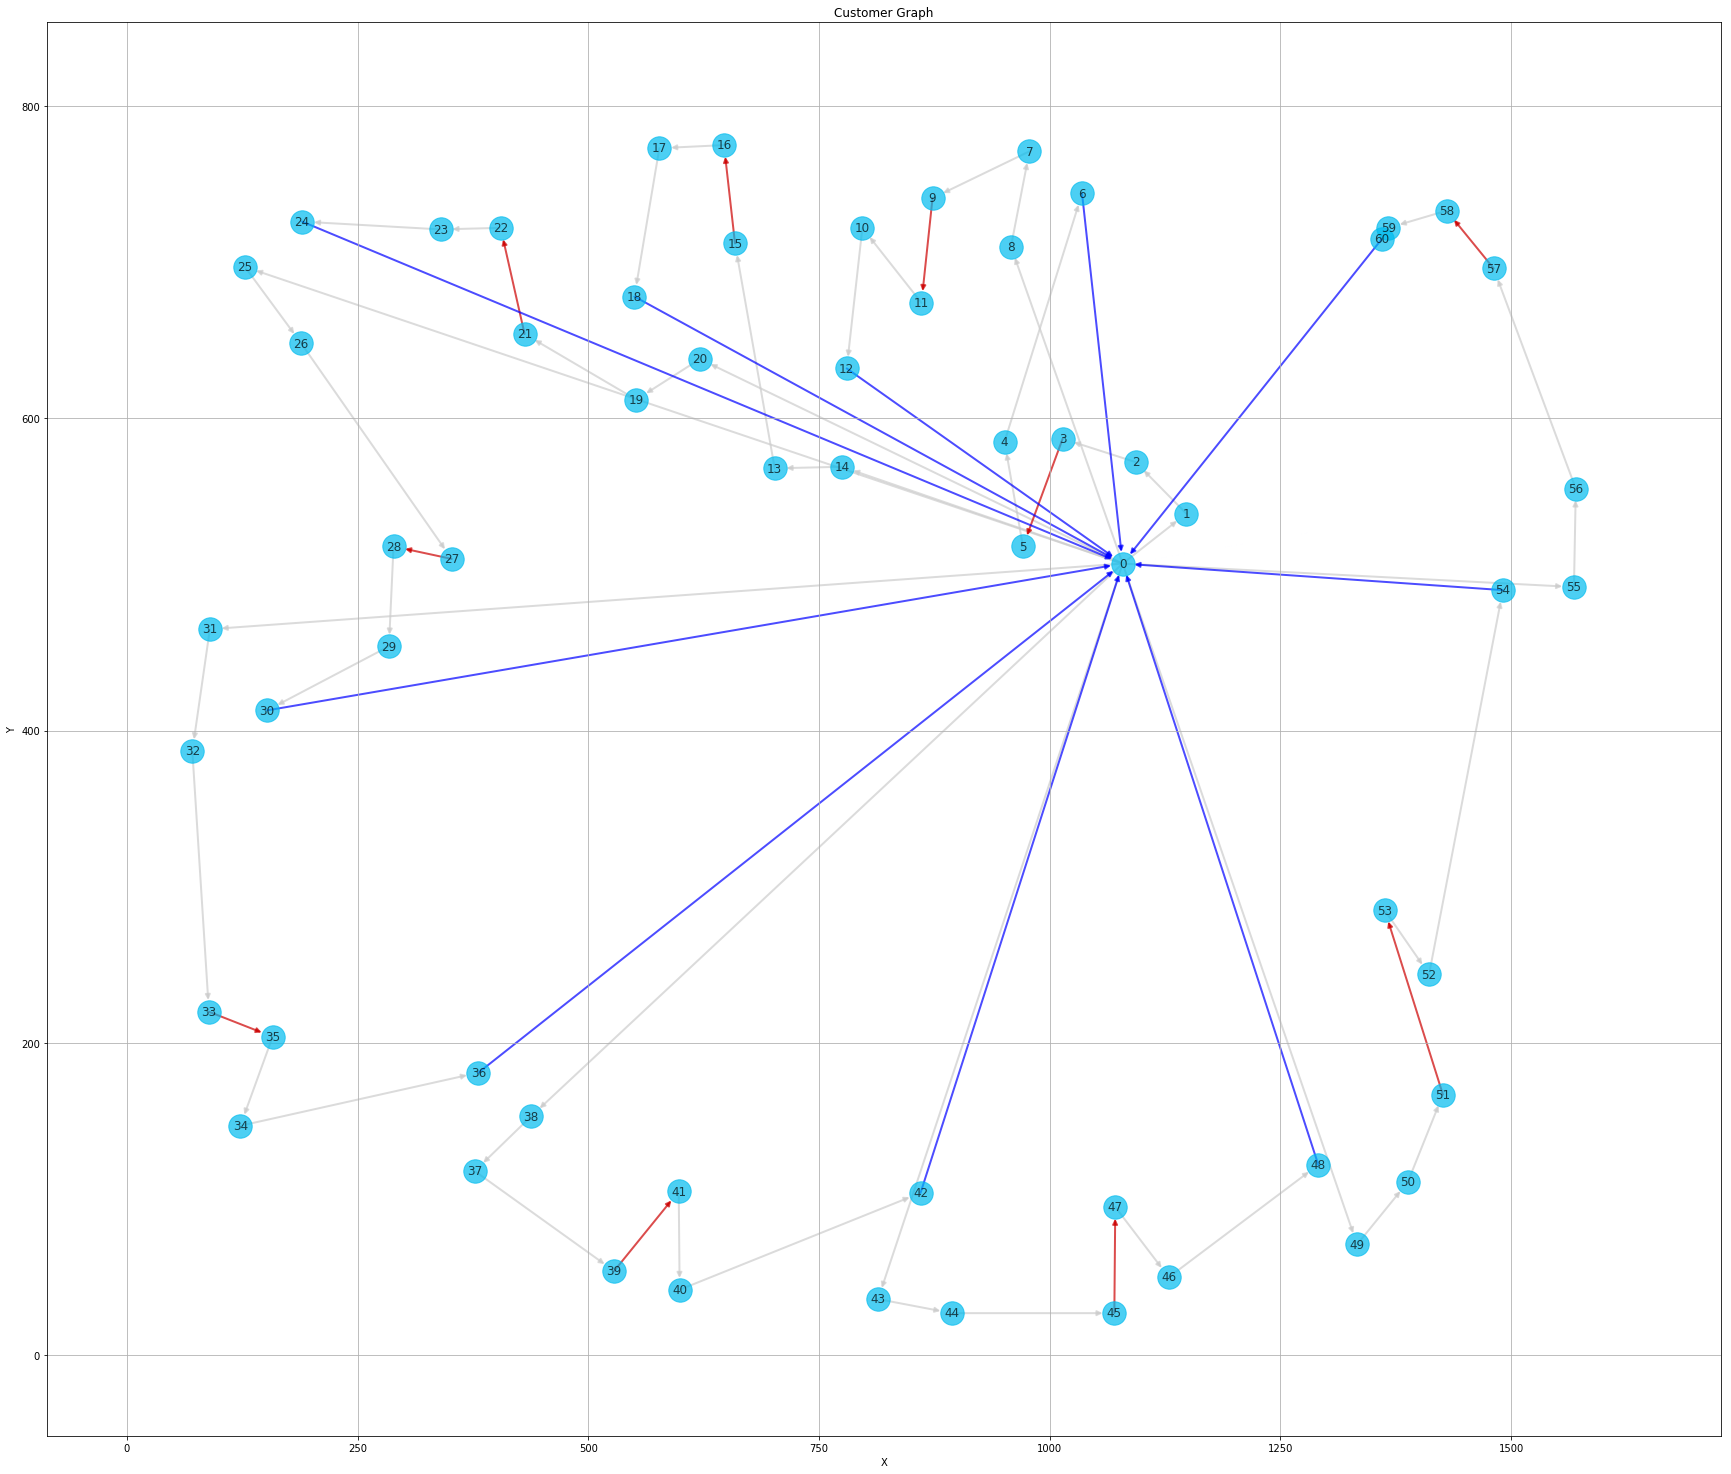

In [217]:
X = nx.Graph()
pos = {}
plot_entire_graph(X)

In [ ]:
# 4th part is to run the tsp problem using qskit algoritm. 

from qiskit.aqua.translators.ising import tsp

import logging
from qiskit.aqua import set_qiskit_aqua_logging
import time

#Quantum - solution
solutions=[]
out_edges = [] 
time_diff = {}
for zone_id in range(len(zones)):
    start = timer()
    print("start timer : " , start)

    nodes_for_zone=zones[zone_id]
    instance=create_distance_matrix_for_zone(zone_id)
          
        
    n = 3
    #num_qubits = n ** 2
    #ins = tsp.random_tsp(n)
    #insList = list(ins)
    #It is important to real
    coord = [[5.5100391375334326, 7.9872448071072135],
        [7.559639370825573, 2.2741572523311104],
        [4.357164910072608, 6.055345738402197],
        [0.4293142250893367, 5.7923100691603135]]
    ins = tsp.TspData(name='AMC', dim=4, coord=coord, w=instance)
#     print(ins)
    qubitOp, offset = tsp.get_tsp_qubitops(ins)
    algo_input = EnergyInput(qubitOp)
#     print('Paulis: ',qubitOp.aer_paulis,'\n')
#     print('Flat Paulis: ',qubitOp.get_flat_pauli_list(),'\n')
#     print('\nmatrix: ',qubitOp.matrix,'\n')
#     print('num qubits: ',qubitOp.num_qubits,'\n')
#     print('Algorithm Input: ',algo_input,'\n')
    #Making the Hamiltonian in its full form and getting the lowest eigenvalue and eigenvector
    ee = ExactEigensolver(qubitOp, k=1)
    result = ee.run()
#     print('energy:', result['energy'])
#     print('tsp objective:', result['energy'] + offset)
#     import sys
    np.set_printoptions(threshold=1000)
    print(result['eigvecs'])
    x = tsp.sample_most_likely(result['eigvecs'][0])
    print('feasible:', tsp.tsp_feasible(x))
    z = tsp.get_tsp_solution(x)
    print('solution:', z)
    print('solution objective:', tsp.tsp_value(z, ins.w))
    #print(pos)
    #draw_tsp_solution(G, best_order, colors, pos)
    draw_tsp_solution(X, z, pos)


    solutions.append(min_cost_path)
    end = timer()
    print("end timer: " , end)
    
    time_diff[zone_id] = timedelta(seconds=end-start)
    
    print("**********timedelta for tsp solution : " , timedelta(seconds=end-start))

    
    # put qiskit here : 
    seed = 10598
    #seed =1
    set_qiskit_aqua_logging(logging.INFO)  # choose INFO, DEBUG to see the log

    #Now we use the VQE that needs two algorithms as sub-components
    #Sub-Component 1 : a local optimizer, we use SPSA/COBYLA(Constrained Optimization BY Linear Approximation) 
    #from qiskit.aqua.components.optimizers
    cobyla = COBYLA()
    cobyla.set_options(maxiter=250)
    spsa = SPSA(max_trials=300)
    #Sub-Component 2 : a variational form, we use Ry from qiskit.aqua.components.variational_forms
    #ry = RY(qubitOp.num_qubits, depth=3, entanglement='full')
    ry = RY(qubitOp.num_qubits, depth=3, entanglement='linear')
    #vqe = VQE(qubitOp, ry, cobyla, 'matrix')
    vqe = VQE(qubitOp, ry, spsa, 'matrix')
    vqe.random_seed = seed

    backend = BasicAer.get_backend('statevector_simulator')
    quantum_instance = QuantumInstance(backend, seed=seed, seed_transpiler=seed)

    start = timer()
    
    start_time=time.time()
    result = vqe.run(quantum_instance)
    print("Ran For %s seconds" % (time.time() - start_time))
    """
    algorithm_cfg = {
        'name': 'VQE',
        'operator_mode': 'matrix'
    }

    optimizer_cfg = {
        'name': 'SPSA',
        'max_trials': 300
    }

    var_form_cfg = {
        'name': 'RY',
        'depth': 5,
        'entanglement': 'linear'
    }

    params = {
        'problem': {'name': 'ising', 'random_seed': seed},
        'algorithm': algorithm_cfg,
        'optimizer': optimizer_cfg,
        'variational_form': var_form_cfg,
        'backend': {'provider': 'qiskit.BasicAer', 'name': 'statevector_simulator'}
    }
    result = run_algorithm(parahms,algo_input)
    """

    print(result)    
    # print('energy:', result['energy'])
    # print('time:', result['eval_time'])
    #print('tsp objective:', result['energy'] + offset)
    x = tsp.sample_most_likely(result['eigvecs'][0])
    print('feasible:', tsp.tsp_feasible(x))
    if(tsp.tsp_feasible(x)) :
        z = tsp.get_tsp_solution(x)
        print('solution:', z)
        print('solution objective:', tsp.tsp_value(z, ins.w))
        draw_tsp_solution(X, z, pos)


    end = timer()
    print("end timer: " , end)
    
    time_diff[zone_id] = timedelta(seconds=end-start).microseconds
    
    print("**********timedelta for statevector_simulator using Quantum instance: " , timedelta(seconds=end-start).total_seconds())        